### Data cleaning and exploratory data analysis (EDA)

In the last notebook, we scrapped data from pdf files that were downloaded from [TRREB's](https://trreb.ca/index.php/market-news/mls-home-price-index/mls-home-price-index-archive) website. In this notebook, we will clean that data and perform exploratory data analysis. 

In [302]:
import pandas as pd
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

### Yearly Trend of Housing Prices and  Sales
First, we will look at the variation of housing prices and sales over the years since 1976. To understand cuases of this trend, we will look trend of some of the socio-economic varibles over the years, for example, population, mortgage interest rates, and inflation rate. 

In [2]:
df_yearly_sales = pd.read_csv('data/yearly_sales.csv')

In [9]:
#check top five rows 
df_yearly_sales.head()

Unnamed: 0  Year    Sale Average_Sale_Price
0           0  1976  19,025            $61,389
1           1  1977  20,512            $64,559
2           2  1978  21,184            $67,333
3           3  1979  23,466            $70,830
4           4  1980  26,017            $75,694

In [10]:
df_yearly_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          46 non-null     int64 
 1   Year                46 non-null     int64 
 2   Sale                46 non-null     object
 3   Average_Sale_Price  46 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.6+ KB


We see that the `Sale` and `Average_Sale_Price` have datatypes as object. Let's convert them to int/float.  

In [16]:
df_yearly_sales['Sale'] = df_yearly_sales['Sale'].str.replace(',', '').astype(float)

In [22]:
df_yearly_sales['Average_Sale_Price'] = df_yearly_sales['Average_Sale_Price'].str.replace('[,$]', '', regex=True).astype(float)

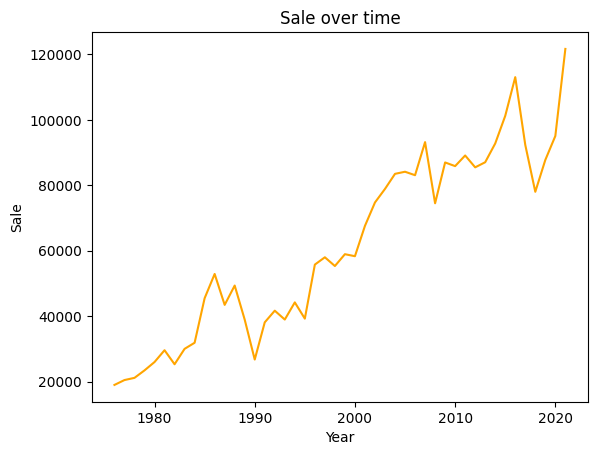

In [263]:
#plot housing sales over the years 
def plot_annual(df, x, y):
    plt.figure()
    plt.plot(df[x], df[y], color='orange', linestyle='-', label=y)
    plt.title(f'{y} over time')
    plt.xlabel(f'{x}')
    plt.ylabel(f'{y}')
    return plt.gca()
plot_annual(df_yearly_sales, 'Year', 'Sale')
plt.show()

We can see from the figure that number of houses sold are increasing over the years. There were three abrupt changes in the sales for the years `1986`, `2007`, and `2016`. The sales were very high during these years and then decreased drastically during the next few years.    

- The abrupt change in sales during `1986` was due to housing [bubble](https://runningofthebulls.typepad.com/files/canadian-housing-bubble.pdf).     

- Similarly the sudden drop in sales between the year `2007` and `2010` can be attributed to `2008` [financial crisis](https://onlinelibrary.wiley.com/doi/full/10.1111/j.1468-2427.2012.01184.x) in the US.  
- Finally, there was a sudden change in housing sales in the year `2017`. [Experts](https://www.philocities.com/torontorealestate/2017/12/21/what-really-happened-in-torontos-2017-real-estate-market-whats-to-come-in-2018) say this happended due to ontario goverment's regulation, fair housing plan that consisted of 16 new rules to cool the housing market. The most important rule among these one was 15% non-resident tax.   

Now let's look varation of housing prices over the years. 

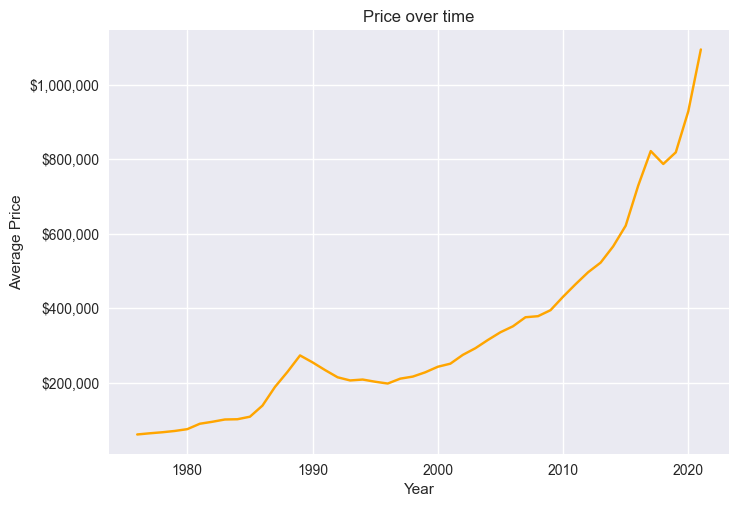

In [361]:
ax = plot_annual(df_yearly_sales, 'Year', 'Average_Sale_Price')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
plt.ylabel('Average Price')
plt.title('Price over time')
plt.show()

From the figure above we can see that price has a trend similar to sales over the years. This makes sense, if we sell more number of houses the demand of houses will go up and that will lead to increase in the price for houses.  

We can also see that there are three inverted `V` shape peaks in the graph for the years `1986`, `2007`, and `2016`. The reason for these peaks is same as for sales - the 1989 housing bubble, 2008 financial crisis and 2017 ontario goverment regulations.    

Some insights from the above graph:   
- Between the years 1985 and 1989 the price of house in Toronto increased 150%. Low unemployment rate of the late 1980s ([7.5%](https://www.indexmundi.com/canada/unemployment_rate.html) as compared to 11.4% in 1985) and and large immigration inflow (11.5% increase from 1980 to 1985) helped to inflate the housing [bubble](http://www.torontocondobubble.com/2013/02/toronto-housing-bubble-in-1980s.html). Further analysis is needed to assess the reasons for housing bubble in 1989.   
- It took thirteen years (1989 to 2002) to recover housing prices to the levels in 1989 in Toronto. And this calculation is without accounting the inflation over the 13 years.    
- The housing market crash in 1989 was worse than in 2008 and 2017. It took only 2 and 3 years to recover the housing market in the year 2008 and 2017, respectively.   

In [43]:
df_population = pd.read_excel('data/population_growth.xlsx')

In [44]:
df_population.head()

Year  Population  Growth Rate
0  2022     6313000       0.0093
1  2021     6255000       0.0094
2  2020     6197000       0.0094
3  2019     6139000       0.0094
4  2018     6082000       0.0120

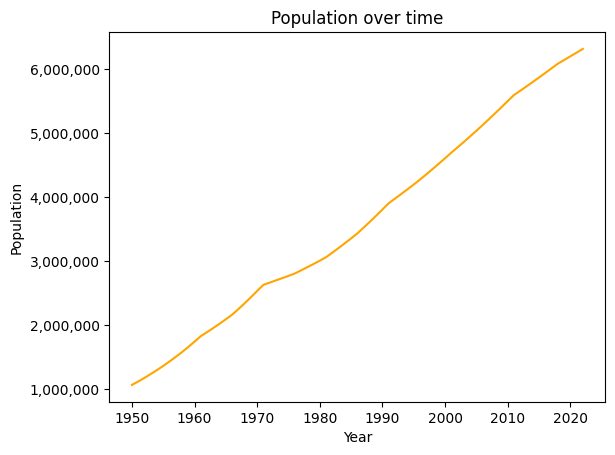

In [260]:
ax = plot_annual(df_population, 'Year', 'Population')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

The figure above shows the population growth of Toronto over the last 70 years. We can see that the population is increasing steadly and linearly with time. This increase in the population will create a increase in demand for houses that can lead to increase in the price. It is hard to tell the exact effect of population on the price trend. It would be interesting to see effect of immigration population on housing price over time. It was hard to find the exact data for non-resident living in Toronto becuase of the way the data is collected.       

In [46]:
df_interest = pd.read_csv('data/interest_rates.csv')
df_interest.head()

Month   Rate
0  Jan-75  11.81
1  Feb-75  10.95
2  Mar-75  10.65
3  Apr-75  10.67
4  May-75  10.99

In [53]:
map_dict = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10,
           'nov':11, 'dec':12}

In [57]:
#Make two new columns for year and month
df_interest[['Month', 'Year']] = df_interest['Month'].str.split('-', expand=True)

In [61]:
#change month name to number 
df_interest['Month'] = df_interest['Month'].str.lower().map(map_dict)

In [71]:
#change datatype
df_interest['Year'] = df_interest['Year'].astype(int)

In [72]:
#convert year to 4 digit format
df_interest['Year'] = df_interest['Year'].apply(lambda x: x+2000 if x<23 else x+1900)

In [73]:
#get interest rates over years
df_interest_yearly = df_interest[['Year', 'Rate']].groupby('Year').max().reset_index()

In [74]:
df_interest_yearly.head()

Year   Rate
0  1975  12.15
1  1976  12.03
2  1977  10.75
3  1978  11.53
4  1979  14.46

In [154]:
#save data for later use 
df_interest_yearly.to_csv('data/yearly_interest.csv')

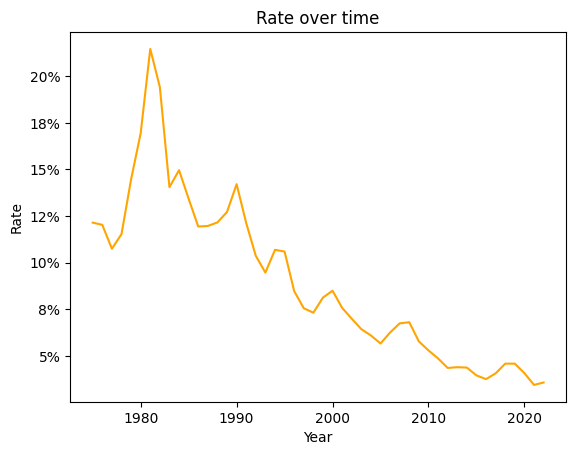

In [261]:
ax = plot_annual(df_interest_yearly, 'Year', 'Rate')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:.0f}%'))
plt.show()

The figure above show the 5 year fixed mortgage rate since 1976. We can see that there are number of spikes in the graph that represent a sudden change in the mortgage rate. 
- When interest rates increase, the cost of borrowing money for buying house becomes more expensive. This makes purchaing house expensive and customers spends less which results in slow down of housing market. 
- The first spike is in the year 1981 when bank of Canada increased mortgage rate to 21% for fighting high [inflation](https://www.theglobeandmail.com/real-estate/the-market/remember-when-what-have-we-learned-from-80s-interest-rates/article24398735/). 
- There was again a second spike in the interest rates in 1989 (13%) to control the inflation. [Expert](https://www.theglobeandmail.com/real-estate/the-market/remember-when-what-have-we-learned-from-80s-interest-rates/article24398735/) believes that this increase in interest rate was one of the reason for housing market crash.

From the plots above we can see that there is a trend between sales-price and interest-price. Let's plot them these graphs on a single figure to analyze the trend. 

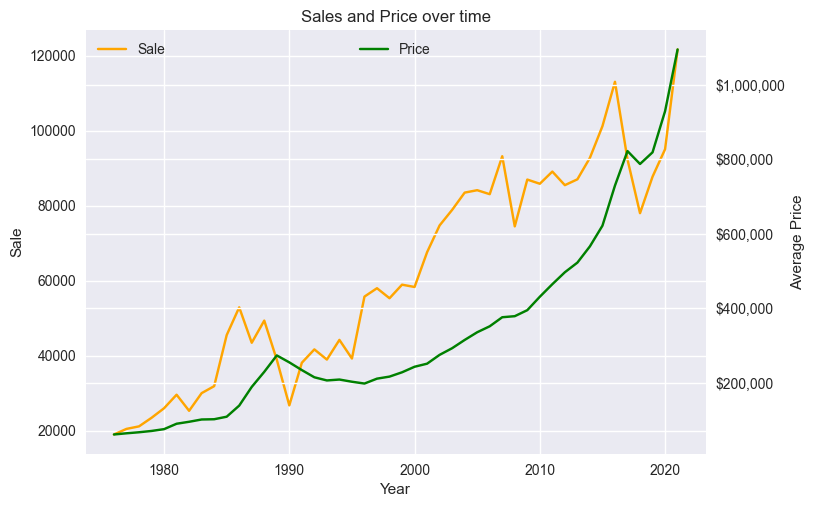

In [371]:
ax = plot_annual(df_yearly_sales, 'Year', 'Sale')
plt.title('Sales and Price over time')
plt.legend(['Sale'], loc='best')
ax2 = ax.twinx()
ax2.plot(df_yearly_sales['Year'], df_yearly_sales['Average_Sale_Price'],
          color='green', linestyle='-', label='Price')
ax2.set_ylabel("Average Price")
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
plt.legend(['Price'], loc='upper center')

plt.show()


In general when the number of sales for houses increase the demand in housing market will increase. This increase in demand will cause in increase in the price for houses.    

For the figure above we can see that the when the number of sales increase from 1980 to 1986 the demand for houses in the market increase. This increase in demand causes increase in the price for houses. In 1989 when bank of canada increaed the interest rates to fight with inflation, the sales for houses went down. The decrease in sales reduced demand in housing market which cuased a dreastic decrease in the prices. 

One thing to note here, there is time lag betweent the trend for sales and price i.e. the peak point for sales is lagging behind by 3 years. This may be due to the fact that the market takes to show effect of change in demand on prices.   

__A similar trend between sales and price can be observed for the year of 2017.__  

Now let's plot price with interest rate and see if there is a pattern in the data.   

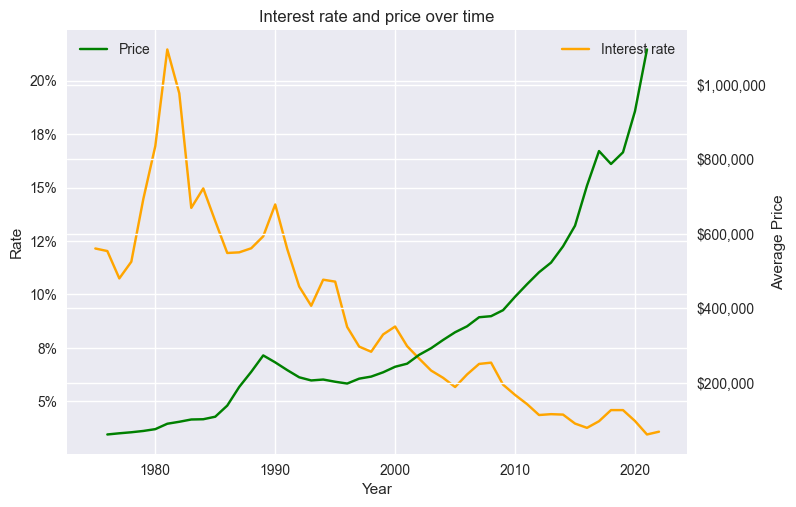

In [373]:
ax = plot_annual(df_interest_yearly, 'Year', 'Rate')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:.0f}%'))
plt.legend(['Interest rate'])
plt.title('Interest rate and price over time')
ax2 = ax.twinx()
ax2.plot(df_yearly_sales['Year'], df_yearly_sales['Average_Sale_Price'],
          color='green', linestyle='-', label='Price')
ax2.set_ylabel("Average Price")
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
plt.legend(['Price'], loc='best')
plt.show()

The graph above shows the variation of 5 year fixed mortgage rate and average price over the years. In general when interest are high, it is expensive to buy a house. This makes it difficult to buy a house and the demand housing market goes down. The decrease in demand causes a decrease in price for houses. 

We can see for the year 1989 that the prices are going down after this year due to increase in the interest rate. A similar pattern can be seen for the year 2017 when ontario goverment increased the interest rates.  

One thing to note here is even thogh the interest rate was really high in the year 1981, the house prices were still going up. Expert say this happend due to large immigraiton inflow and low unemployment rate as explained before. The booming market encouraged people to take bigger risk.   

We can see for the year 2017, when ontario government increased the interest rates prices went down for houses. It took around 2 years to recover these prices. 

### Monthly Trend of Housing Prices in Toronto      

Unitl now, we have seen the annual trend of house prices in Toronto over the years and it's relation with different socio-economic parameters such as population, and interest rates. This analysis gives us a general intuation about the dynamics of housing market. This analysis also helped us in understanding major events with sudden changes in the housing prices for example, in 1989, 2008 and 2018.  

In order to further understand the reasons/causes of drastic change in housing prices over recent years, we will analyse a data with more granularity. To increae the granularity, house price data for different neighbourhoods for each of the month for last 10 years were collected. 

In [155]:
df_price = pd.read_csv('data/housing_price.csv', index_col=0)
df_MLS = pd.read_csv('data/housing_MLS.csv', index_col=0)

In [156]:
df_price.head()

Name  Sales   Dollar Volume Average Price Median Price  \
0             TREB Total  4,567  $2,116,961,749      $463,534     $392,000   
1  City of Toronto Total  1,705    $850,871,140      $499,045     $396,000   
2           Toronto West    433    $173,892,394      $401,599     $360,000   
3            Toronto W01     17      $9,044,400      $532,024     $490,000   
4            Toronto W02     41     $19,072,811      $465,191     $439,000   

  New listings    SNLR Active listings   MI Avg SP/LP  Avg DOM  year  month  
0        9,655  60.70%          12,290  2.2       98%     32.0    12      1  
1        4,041  59.60%           5,134  2.2       99%     31.0    12      1  
2        1,032  58.10%           1,419  2.6       98%     38.0    12      1  
3           71  60.00%              88  2.1      100%     24.0    12      1  
4           67  70.30%              63  1.2      101%     24.0    12      1

In [157]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4893 entries, 0 to 4892
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             4893 non-null   object 
 1   Sales            4893 non-null   object 
 2   Dollar Volume    4893 non-null   object 
 3   Average Price    4893 non-null   object 
 4   Median Price     4893 non-null   object 
 5   New listings     4893 non-null   object 
 6   SNLR             4893 non-null   object 
 7   Active listings  4893 non-null   object 
 8   MI               4893 non-null   float64
 9   Avg SP/LP        4893 non-null   object 
 10  Avg DOM          4386 non-null   float64
 11  year             4893 non-null   int64  
 12  month            4893 non-null   int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 535.2+ KB


We can see in our dataframe that the columns `Sales`, `Dollar Volume`, `Average Price`, `Median Price`, `New listings`, `SNLR`, `Active listings`, and `Avg SP/LP` have object type data. These columns should be of float type. Let's create a function that take a dataframe and object datatype columns and clean returns a cleaned verstion of dataframe.     

In [158]:
def clean_df(df, columns):
    """Cleans strings in dataframe columns and returns as float
    Parameters
    ----------
    df: dataframe, dataframe to be cleaned
    columns: list, list of columns that need to be changed to float
    Returns
    -------
    A dataframe with object type columns changed to float after cleaning"""
    for col in columns:
        df[col] = df[col].str.replace('[,$%]', '', regex=True).astype(float)
        
    return df

In [159]:
#clean price data using the defined function
df_price = clean_df(df_price, ['Sales', 'Dollar Volume', 'Average Price', 'Median Price', 'New listings',
                     'SNLR', 'Active listings', 'Avg SP/LP'])

In [279]:
#check out datatype
df_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4893 entries, 0 to 4892
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Name             4893 non-null   object        
 1   Sales            4893 non-null   float64       
 2   Dollar Volume    4893 non-null   float64       
 3   Average Price    4893 non-null   float64       
 4   Median Price     4893 non-null   float64       
 5   New listings     4893 non-null   float64       
 6   SNLR             4893 non-null   float64       
 7   Active listings  4893 non-null   float64       
 8   MI               4893 non-null   float64       
 9   Avg SP/LP        4893 non-null   float64       
 10  Avg DOM          4386 non-null   float64       
 11  year             4893 non-null   int64         
 12  month            4893 non-null   int64         
 13  day              4893 non-null   int64         
 14  date             4893 non-null   datetim

In [280]:
df_price.head()

Name   Sales  Dollar Volume  Average Price  Median Price  \
0            TRREB Total  4567.0   2.116962e+09       463534.0      392000.0   
1  City of Toronto Total  1705.0   8.508711e+08       499045.0      396000.0   
2           Toronto West   433.0   1.738924e+08       401599.0      360000.0   
3            Toronto W01    17.0   9.044400e+06       532024.0      490000.0   
4            Toronto W02    41.0   1.907281e+07       465191.0      439000.0   

   New listings  SNLR  Active listings   MI  Avg SP/LP  Avg DOM  year  month  \
0        9655.0  60.7          12290.0  2.2       98.0     32.0  2012      1   
1        4041.0  59.6           5134.0  2.2       99.0     31.0  2012      1   
2        1032.0  58.1           1419.0  2.6       98.0     38.0  2012      1   
3          71.0  60.0             88.0  2.1      100.0     24.0  2012      1   
4          67.0  70.3             63.0  1.2      101.0     24.0  2012      1   

   day       date  
0   15 2012-01-15  
1   15 2012-01-15  
2   15 2012-01-15  
3   15 2012-01-15  
4   15 2012-01-15

#### Data dictionary:

`Name`: Neighbourhood      
`Sales`: Total number of houses sold in a particular neighbourhood for a month        
`Dollar Volume`: Total dollar amount from all the sales          
`Average Price`: Total dollar amount/Total Sales           
`Median Price`: Median price of houses in a particular neighbourhood for a month             
`New listings`: Number of new listings in a month          
`Active listings`: Number of active listing at the end of a month           
`SNLR`: Sales to new listing ratio (calculated using 12 months moving average)              
`MI`: Months of inventory - Active listings to sales ration (calculated using 12 months moving average)      
`Avg SP/LP`: average selling price to listing price between first day and last day of the month            
`Avg DOM`: average number of days on the market         
`year`: year      
`month`: month     
`day`: day of month - the data is given for whole month to create a date column, the data is assumed      for 15th day of each month.                  
`date`: Date           

In [284]:
#check for null values 
df_price.isna().any()

Name               False
Sales              False
Dollar Volume      False
Average Price      False
Median Price       False
New listings       False
SNLR               False
Active listings    False
MI                 False
Avg SP/LP          False
Avg DOM             True
year               False
month              False
day                False
date               False
dtype: bool

We can see there are no null vlaues in the data except the column `Avg DOM`. Let's check the number of null values in this column. 

In [163]:
#count
df_price['Avg DOM'].isna().sum()

507

For now I am leaving these null values in the column. If required, I will handle with them later.   

Let's make a date column form the given month and year column. For this, first I will convert year to 4 digit format from two year then I will create a columns for day. I am assuming 15th day of month but the data is for whole month. Finally, I will combine day, month and year to make a date column.   

In [164]:
#change year format to 4 digit 
df_price['year'] = df_price['year'] + 2000

In [165]:
#create a day column for the first day for each month. 
df_price['day'] = 15

In [166]:
#create a date column 
df_price['date'] = pd.to_datetime(df_price[['year', 'month', 'day']]) 

In [169]:
#check unique values of categorical column Name 
df_price['Name'].unique()

array(['TREB Total', 'City of Toronto Total', 'Toronto West',
       'Toronto W01', 'Toronto W02', 'Toronto W03', 'Toronto W04',
       'Toronto W05', 'Toronto W06', 'Toronto W07', 'Toronto W08',
       'Toronto W09', 'Toronto W10', 'Toronto Central', 'Toronto C01',
       'Toronto C02', 'Toronto C03', 'Toronto C04', 'Toronto C06',
       'Toronto C07', 'Toronto C08', 'Toronto C09', 'Toronto C10',
       'Toronto C11', 'Toronto C12', 'Toronto C13', 'Toronto C14',
       'Toronto C15', 'Toronto East', 'Toronto E01', 'Toronto E02',
       'Toronto E03', 'Toronto E04', 'Toronto E05', 'Toronto E06',
       'Toronto E07', 'Toronto E08', 'Toronto E09', 'Toronto E10',
       'Toronto E11', 'TRREB Total'], dtype=object)

We can see here that we have data for all neighbourhoods. One thing to note here, Toronto regional real estate board change name of the row `TREB Total` to `TRREB Total` however both of these columns represent same information. Let's change the Name form `TREB Total` to `TRREB Total`.

In [170]:
#change name 
df_price.replace({'TREB Total': 'TRREB Total'}, inplace=True)

In [285]:
#sanity check - unique values 
df_price['Name'].unique()

array(['TRREB Total', 'City of Toronto Total', 'Toronto West',
       'Toronto W01', 'Toronto W02', 'Toronto W03', 'Toronto W04',
       'Toronto W05', 'Toronto W06', 'Toronto W07', 'Toronto W08',
       'Toronto W09', 'Toronto W10', 'Toronto Central', 'Toronto C01',
       'Toronto C02', 'Toronto C03', 'Toronto C04', 'Toronto C06',
       'Toronto C07', 'Toronto C08', 'Toronto C09', 'Toronto C10',
       'Toronto C11', 'Toronto C12', 'Toronto C13', 'Toronto C14',
       'Toronto C15', 'Toronto East', 'Toronto E01', 'Toronto E02',
       'Toronto E03', 'Toronto E04', 'Toronto E05', 'Toronto E06',
       'Toronto E07', 'Toronto E08', 'Toronto E09', 'Toronto E10',
       'Toronto E11'], dtype=object)

First, I am going to explore each column of the data frame for one neighbourhood and then we will explore each column of dataframe for every neighbourhood. Let's define a funtion that plots a given column for a given neighbourhood over the last 10 years.

In [292]:
def plot_nebhod(df, col, neighbourhood, twin=True):
    
    df_neighbourhood = df[df['Name']==neighbourhood]
    #plot data
    plt.figure()
    plt.plot(df_neighbourhood['date'], df_neighbourhood[col], color='orange', linestyle='-')
    plt.title(f'{neighbourhood}')
    plt.ylabel(f'{col}')
    plt.xlabel('Time')
    ax = plt.gca()
    if twin:
        ax2 = ax.twinx()
        ax2.plot(df_neighbourhood['date'], df_neighbourhood['Average Price'],
                  color='green', linestyle='-', label='Price')
        ax2.set_ylabel("Average Price")
        ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
        plt.legend(loc='best')
        return ax, ax2
    return ax

#### Exploring column `Price`

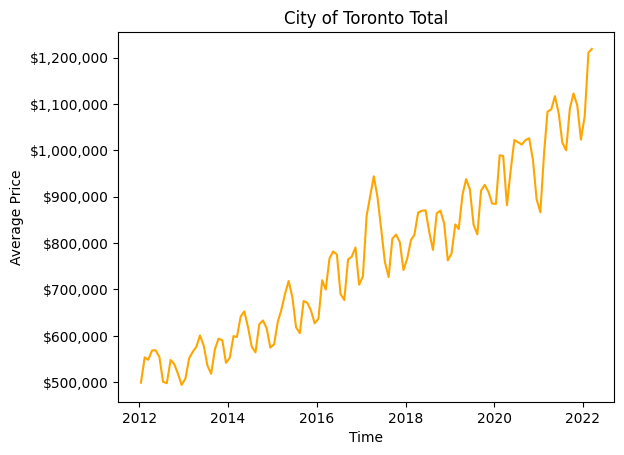

In [293]:
ax = plot_nebhod(df_price, 'Average Price', 'City of Toronto Total', twin=False)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
plt.show()

The figure above shows the change in price over time. As observed before there is an inverted `V` shape peak in our data in the year 2017.  The housing prices are increasing with time. 

#### Exploring `SNLR` column 

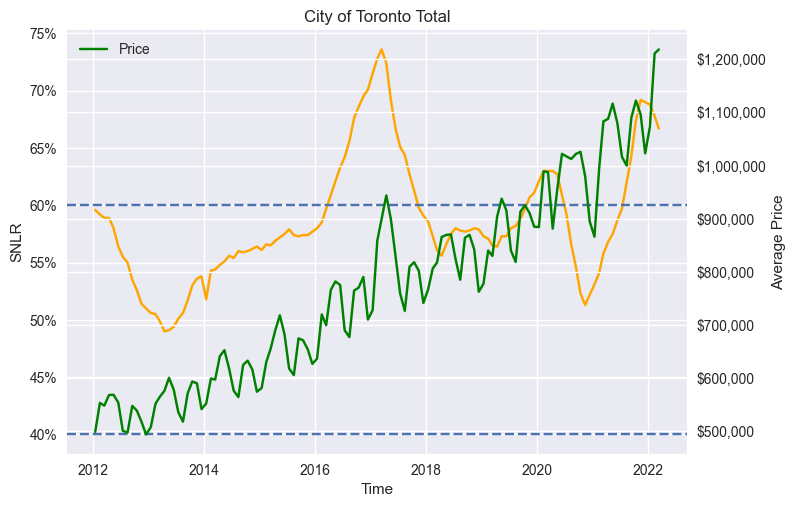

In [303]:
ax, ax2 = plot_nebhod(df_price, 'SNLR', 'City of Toronto Total')
ax.axhline(y=60, linestyle='--')
ax.axhline(y=40, linestyle='--')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}%'))
plt.show()

The figure above shows variation of sales to new listing ratio (SNLR) and price over last 10 years for city of toronto.          
The SNLR ratio is related to market dynamics in the following way:   

|SNLRValue|Market|Comment|
|---------|------|-------|
|Below 40%|Buyer's Market|Give a chance to buyers to come at lower prices|
|Between 40% to 60%| Balanced Market|Balanced market where prices are reasonable|
|Above 60%|Seller's Market|conditions are favorable for sellers to get higher prices for their homes|   

- The curve in orange represent the variation of SNLR over time. We can see that SNLR was above 60% between 2016 and 2018. It again became more than 60% at the end of 2021 and is currently above the 60%. The SNLR above 60% represents seller's market i.e. ther are large number of qualified buyers competing for a small number of homes, allowing sellers to drive up the prices. This situation also represent a lack of house supply in the market. From the graph above we can say that presently the market is seller's market (lack of supply) which is causing high prices.  

- The SNLR ration always have been greater or equal to 50% for the city of Toronto. This shows that in the last 10 years the housing market in Toronto never have been a buyer's market. 

- We can see form the figure above that whenever SNLR raion goes up the price of houses also goes up. We can see this trend in the year 2017 and at the end of 2021. The increase in SNLR ration cuases lack of supply of houses which allows suppliers to set high prices.   





#### Exploring `MI` column 

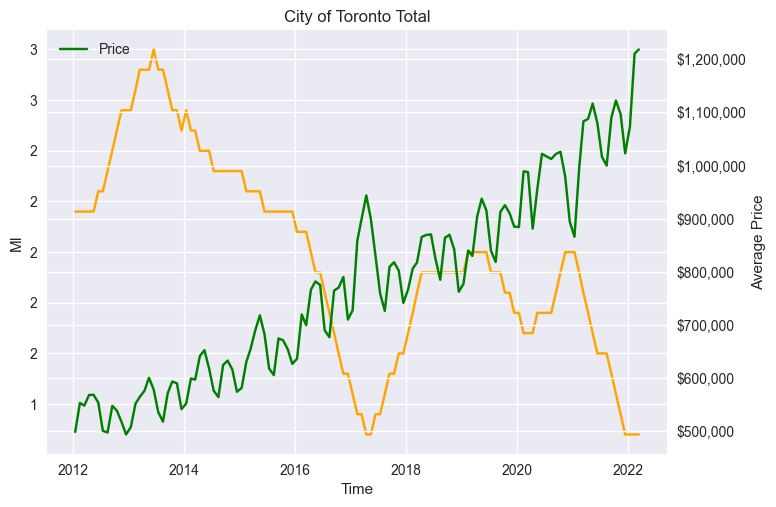

In [306]:
ax, ax2 = plot_nebhod(df_price, 'MI', 'City of Toronto Total')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

The figure above shows variation of active listing to sales ration also known as months of inventory (MI) and price over last 10 years for city of toronto.          
The MI ratio is related to market dynamics in the following way:   

|MI Value|Market|Comment|
|---------|------|-------|
|Above six months|Buyer's Market|Give a chance to buyers to come at lower prices|
|Between 4 and 6 months| Balanced Market|Balanced market where prices are reasonable|
|Below six months|Seller's Market|conditions are favorable for sellers to get higher prices for their homes|   

- The curve in orange represent the variation of MI over time. We can see that MI has been below 4 months for last 10 years. The value below 4 months for MI represents seller's market i.e. ther are large number of qualified buyers competing for a small number of homes, allowing sellers to drive up the prices. This situation also represent a lack of house supply in the market. From the graph above we can say that presently the value of MI is 0.5 months i.e. 'it would take just 15 days to completely liquidate current inventories at the current rate of sales activity.' Again the low value of MI represents the lack of supply which is driving housing prices drastically up.      

- Also we can see that when MI goes down the price of houses goes up. we can see this trend during 2017 and at the end of 2021. The low value of MI represents lack of supply which drives housing prices high.

#### `AvgSP\LP` column

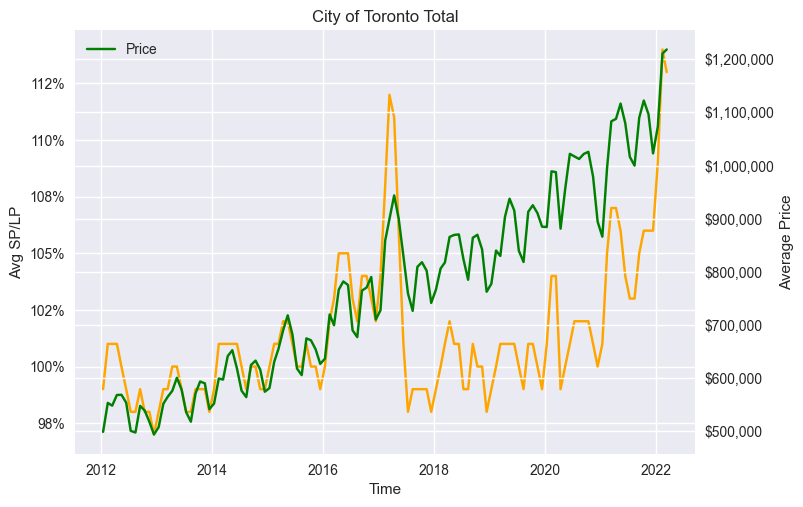

In [308]:
ax, ax2 = plot_nebhod(df_price, 'Avg SP/LP', 'City of Toronto Total')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}%'))
plt.show()

The average selling price to listing price (SP\LP) is represented in percentage. If a house has SP/LP greater than 100% this means the house was sold at more than the listing price. Similarly if the a house as SP/LP ratio below 100%, the house was sold at less than the listing price.   
This ratio can help us in understanding about how closely buyers and sellers are estimating the price of house. In other words if the ratio is more than 100% it represents a storng real estate market.   

- From the figure above we can say that the ratio remained above 100% for the city of Toronto except for some times between 2012 to 2014 adn 2017. This shows that the real estate market is very strong in Toronto. High ratio also shows that people are selling houses in higher prices than the listing prices. This indicates a shortage of houses in the market (lack of supply).      
- Looking at the trned for SP\LP ratio, we can say that with increase in SP\LP ratio the price of houses also increases. We can see this trend in the year 2017 and at the end of 2021.   


#### Exploring `Avg DOM`

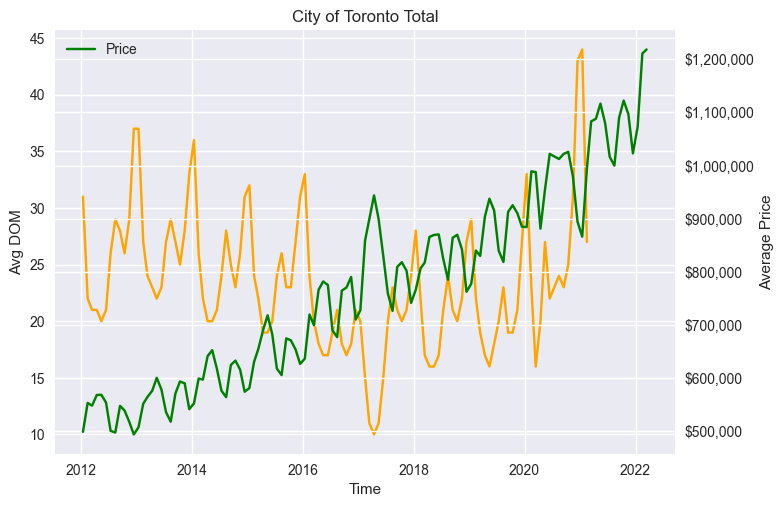

In [310]:
ax, ax2 = plot_nebhod(df_price, 'Avg DOM', 'City of Toronto Total')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

The average days on market (DOM) shows how many days a house remained on the Toronto MLS before it sold. 

A longer DOM value represent that the market has become less competitive. This essentially means that the buyers are taking their time to pick the best options as there is enough supply (choices) in the market. Similarly, lower values of DOM represents that the market is competitive and buyers don't have enought options to buy so they are willing to pay higher prices.       

- In the figure above we can see that the Avg DOM was around 10 in 2017. This means that a typical house in the city of Toronto sold just in 10 days. The lower value of DOM indicates the lack of supply. 

- Also form the figure we can see that with the increase in DOM the price of houses decrease. This trend can be seen in 2017 and 2020. It should be noted that the Avg DOM data was not available for part of 2021 and 2022.   



Until now we have explored the house prices with different variables such as `SNLR`, `MI`, `Avg SP/LP`, and `Avg DOM`. All of these parameters strongly indicated that there is lack of supply in the market. The high prices in city of Toronto are due to a lack of supply. These results were plotted for the City of Toronto, let's see how these results vary neighbourhood to neighbourhood.  

Let's see how housing price vary for each of the neighbourhood for last few years. We will define a function that will plot a given variable with over time for a neighbourhood. 

In [330]:
def plot_col(df, var, ncols, figsize, same=False):
    """plots a column of dataframe for all the neighbourhoods in toronto
    Parameters
    ----------
    df: dataframe, dataframe with the columns to be plotted
    var: list, names of the columns to be plotted
    ncols: int, number of columns in the subplot
    figsize: tuple, width and height of the figure
    Returns
    -------
    matplotlib axes"""
    #get unique names from the column Name
    neighbourhoods = df['Name'].unique()
    #number of rows in the subplot
    nrows=math.ceil(len(neighbourhoods)/ncols)
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)
    counter = 0
    
    for row in range(nrows):
        for col in range(ncols):
            neighbourhood=neighbourhoods[counter]
            #dataframe corresponding for the neighbourhood
            df_neighbourhood = df[df['Name']==neighbourhood]
            #plot data on the subplot at (row, col)
            for v in var:
                axs[row,col].plot(df_neighbourhood['date'], df_neighbourhood[v], linestyle='-', label=v)
            axs[row,col].set_title(f'{neighbourhood}')
            axs[row,col].set_xlabel('Time')
            #axs[row,col].set_ylabel(f'{var[0]}')
            axs[row,col].legend()
            counter = counter + 1
            #if value of counter goes above the lenght of list just plot the first neighbourhood.
            if counter >= len(neighbourhoods):
                counter = 0
    plt.tight_layout()
    return axs

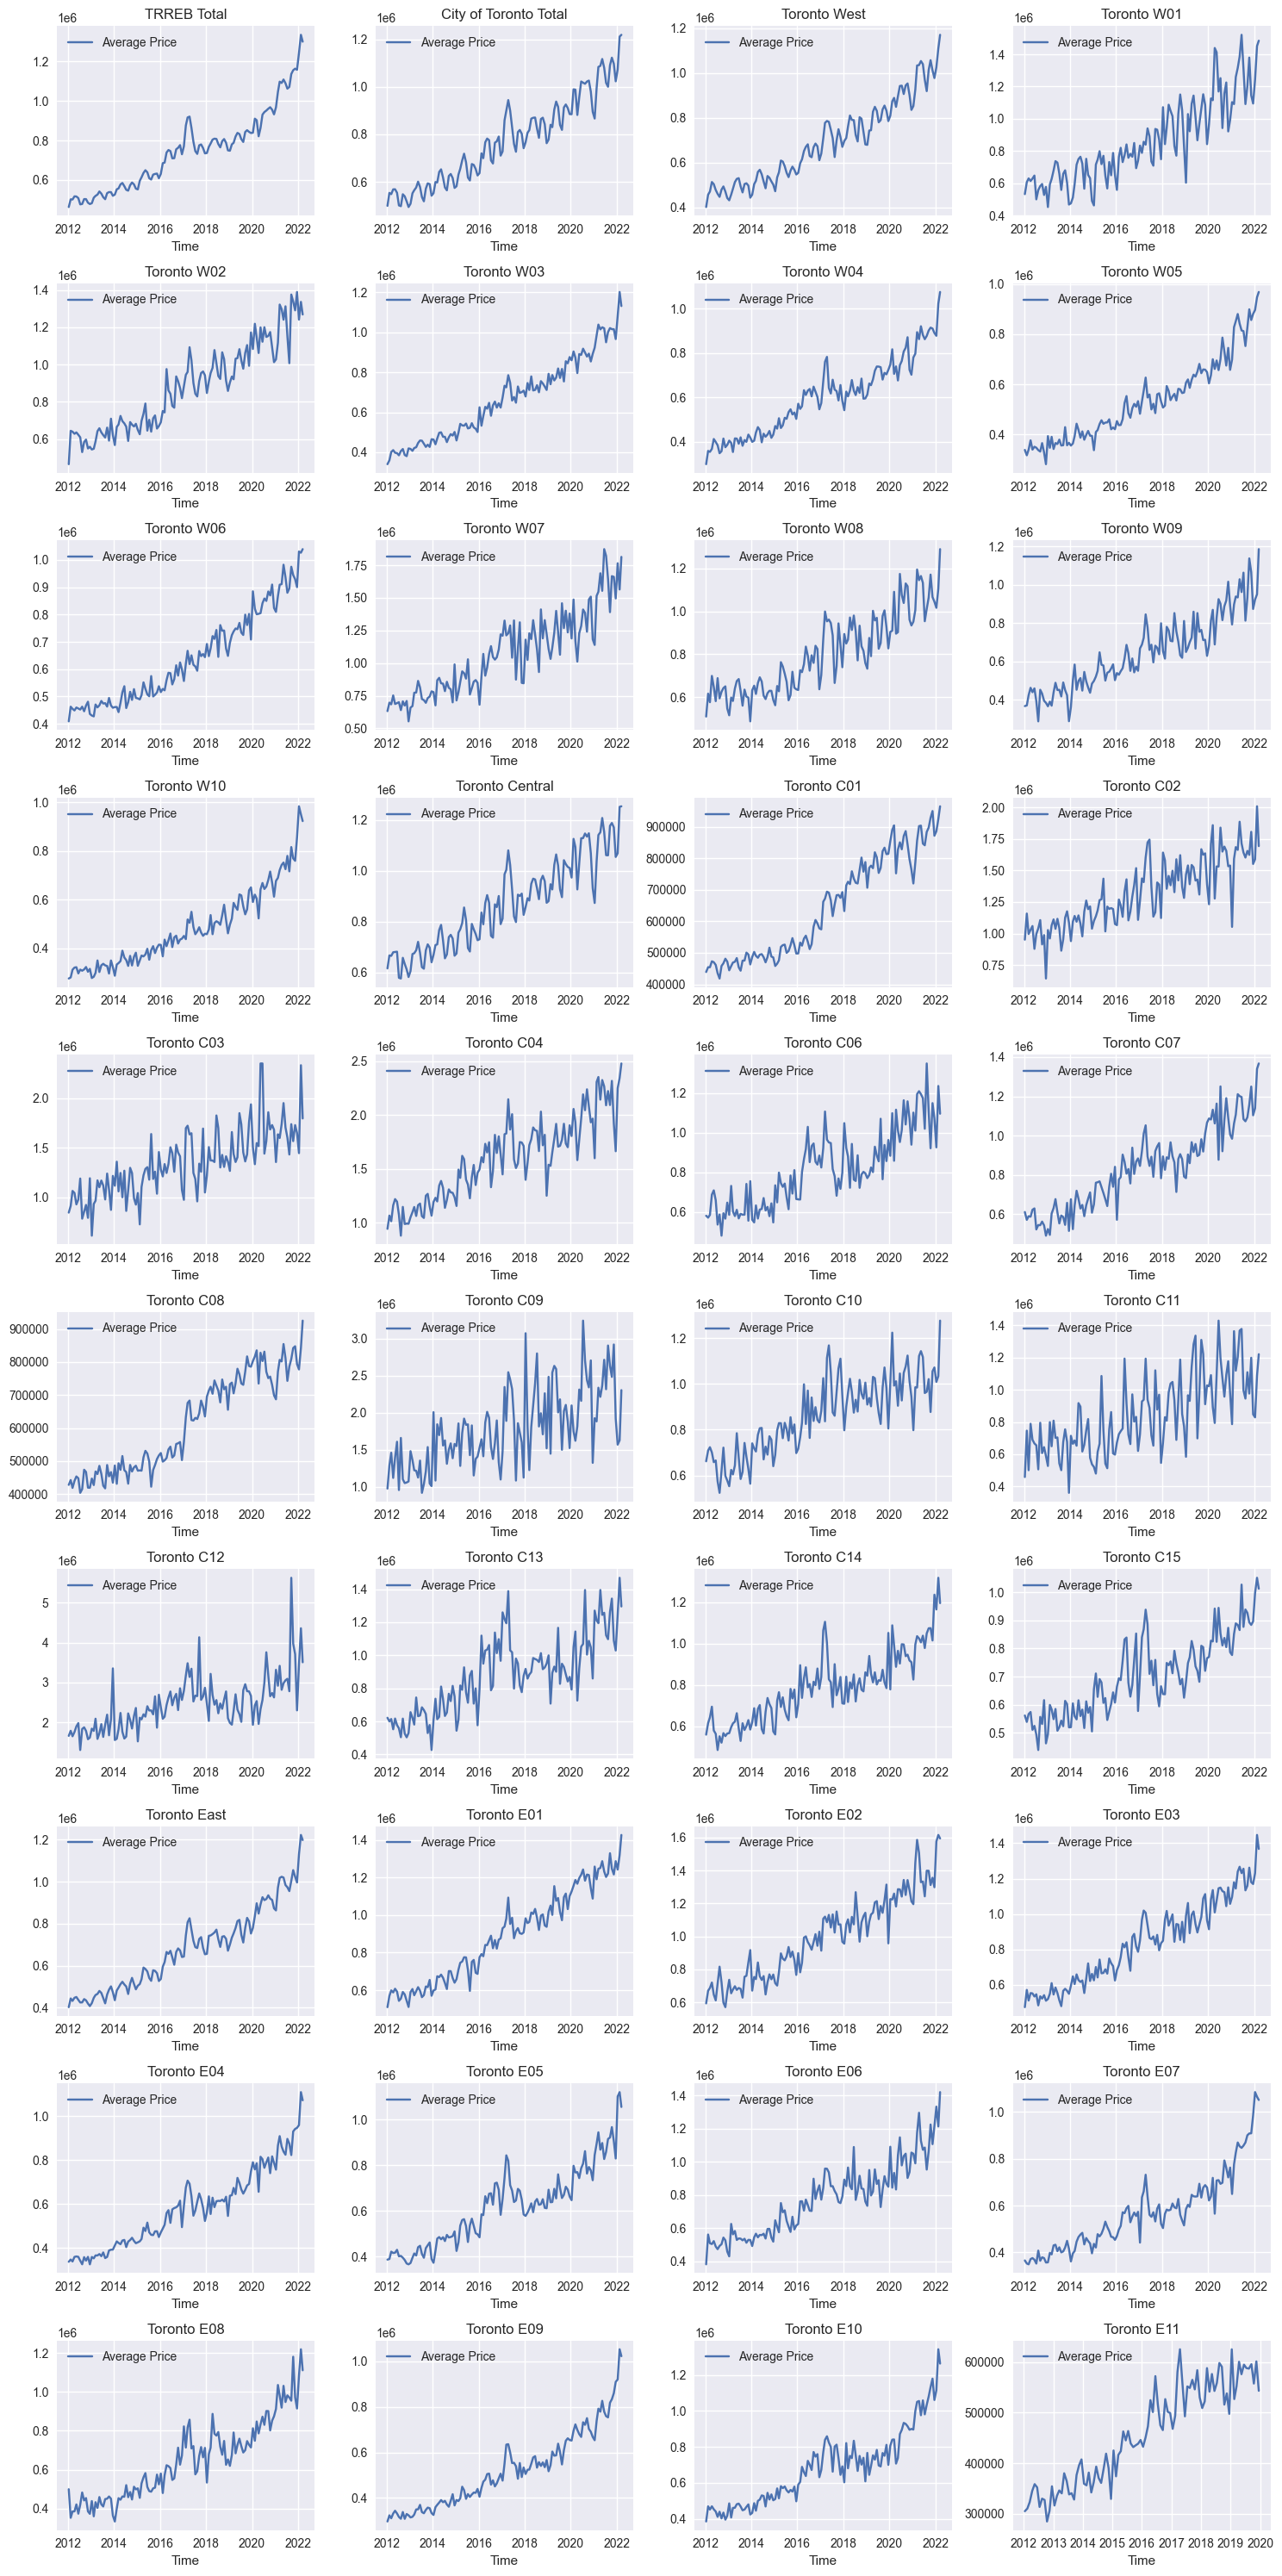

In [331]:
plot_col(df_price, ['Average Price'], 4, figsize=(15,30))
plt.legend()
plt.show()

The figure above shows Average price for houses in different neighbourhoods of city of Toronto. The naming convention for different neighbourhoods is shown in the figure below.     
![neighbourhoods](data/neighbourhoods.png).

We can see from the figure above that all the distircts in Toronto have house prices more than 1M in 2022. The maximum average houing prices for distric E11 is around 600K. This is becuase data for this district is not available after 2020.  

- Toronto west has prices above 1 million for all the districts. The district W10 which is comprised of Rexdale, Clairville, Thistletown-Beaumond Heights and SmithfieldWith had average price aroudn 600k in 2020 but the average housing price in this district currently is above 1 million. This disrict saw large change in average prices as compared to other districs in western Toronto. A similar trend can also be seen for W05 district which is make of Black Creek, Humber Summits, York University Heights, Hembermede, Downsview Roding.

- Central Toronto also has house prices over a million. Some of the districts such as C12 in central Toronto has average house prices more than 4 million dollars. This district includes the Bridle Path, known colloquially as Millionaires’ Row and home to hulking estates, including one formerly owned by Prince. Currently, the most affordable districts in Toronto are C01, C08 and C15.

    C01 district comprise of Niagara, Waterfront communities, chinatown, trinity bellwoods, little portugal. C08 district comprise of Regent Park, Moss Park, water front communities and North st. James town. Finally C15 district comprise of Don valley village, Bayview village, henry farma and pleasent view. These districts had the lowest prices in central Toronto. People  looking for affordable housing should look for these apartments. 

- East toronto also has prices in the range of millions with maximum average price going around 1.4 million dollars. District E2 which includes The beaches, east end danforth, and woodbine corridor has the highest prices. The district E05 which includes Steels, L'Amoreaux, and Tam O-shanter suvillian is most affrdable in East Toronto.   

The above analysis has shown us that the most affordable districts in city of Toronto are C01, C08, and C15. Let's look at other parameters such as `SNLR`, `MI`, `Avg SP/LP`, and `Avg DOM` for these districts.  

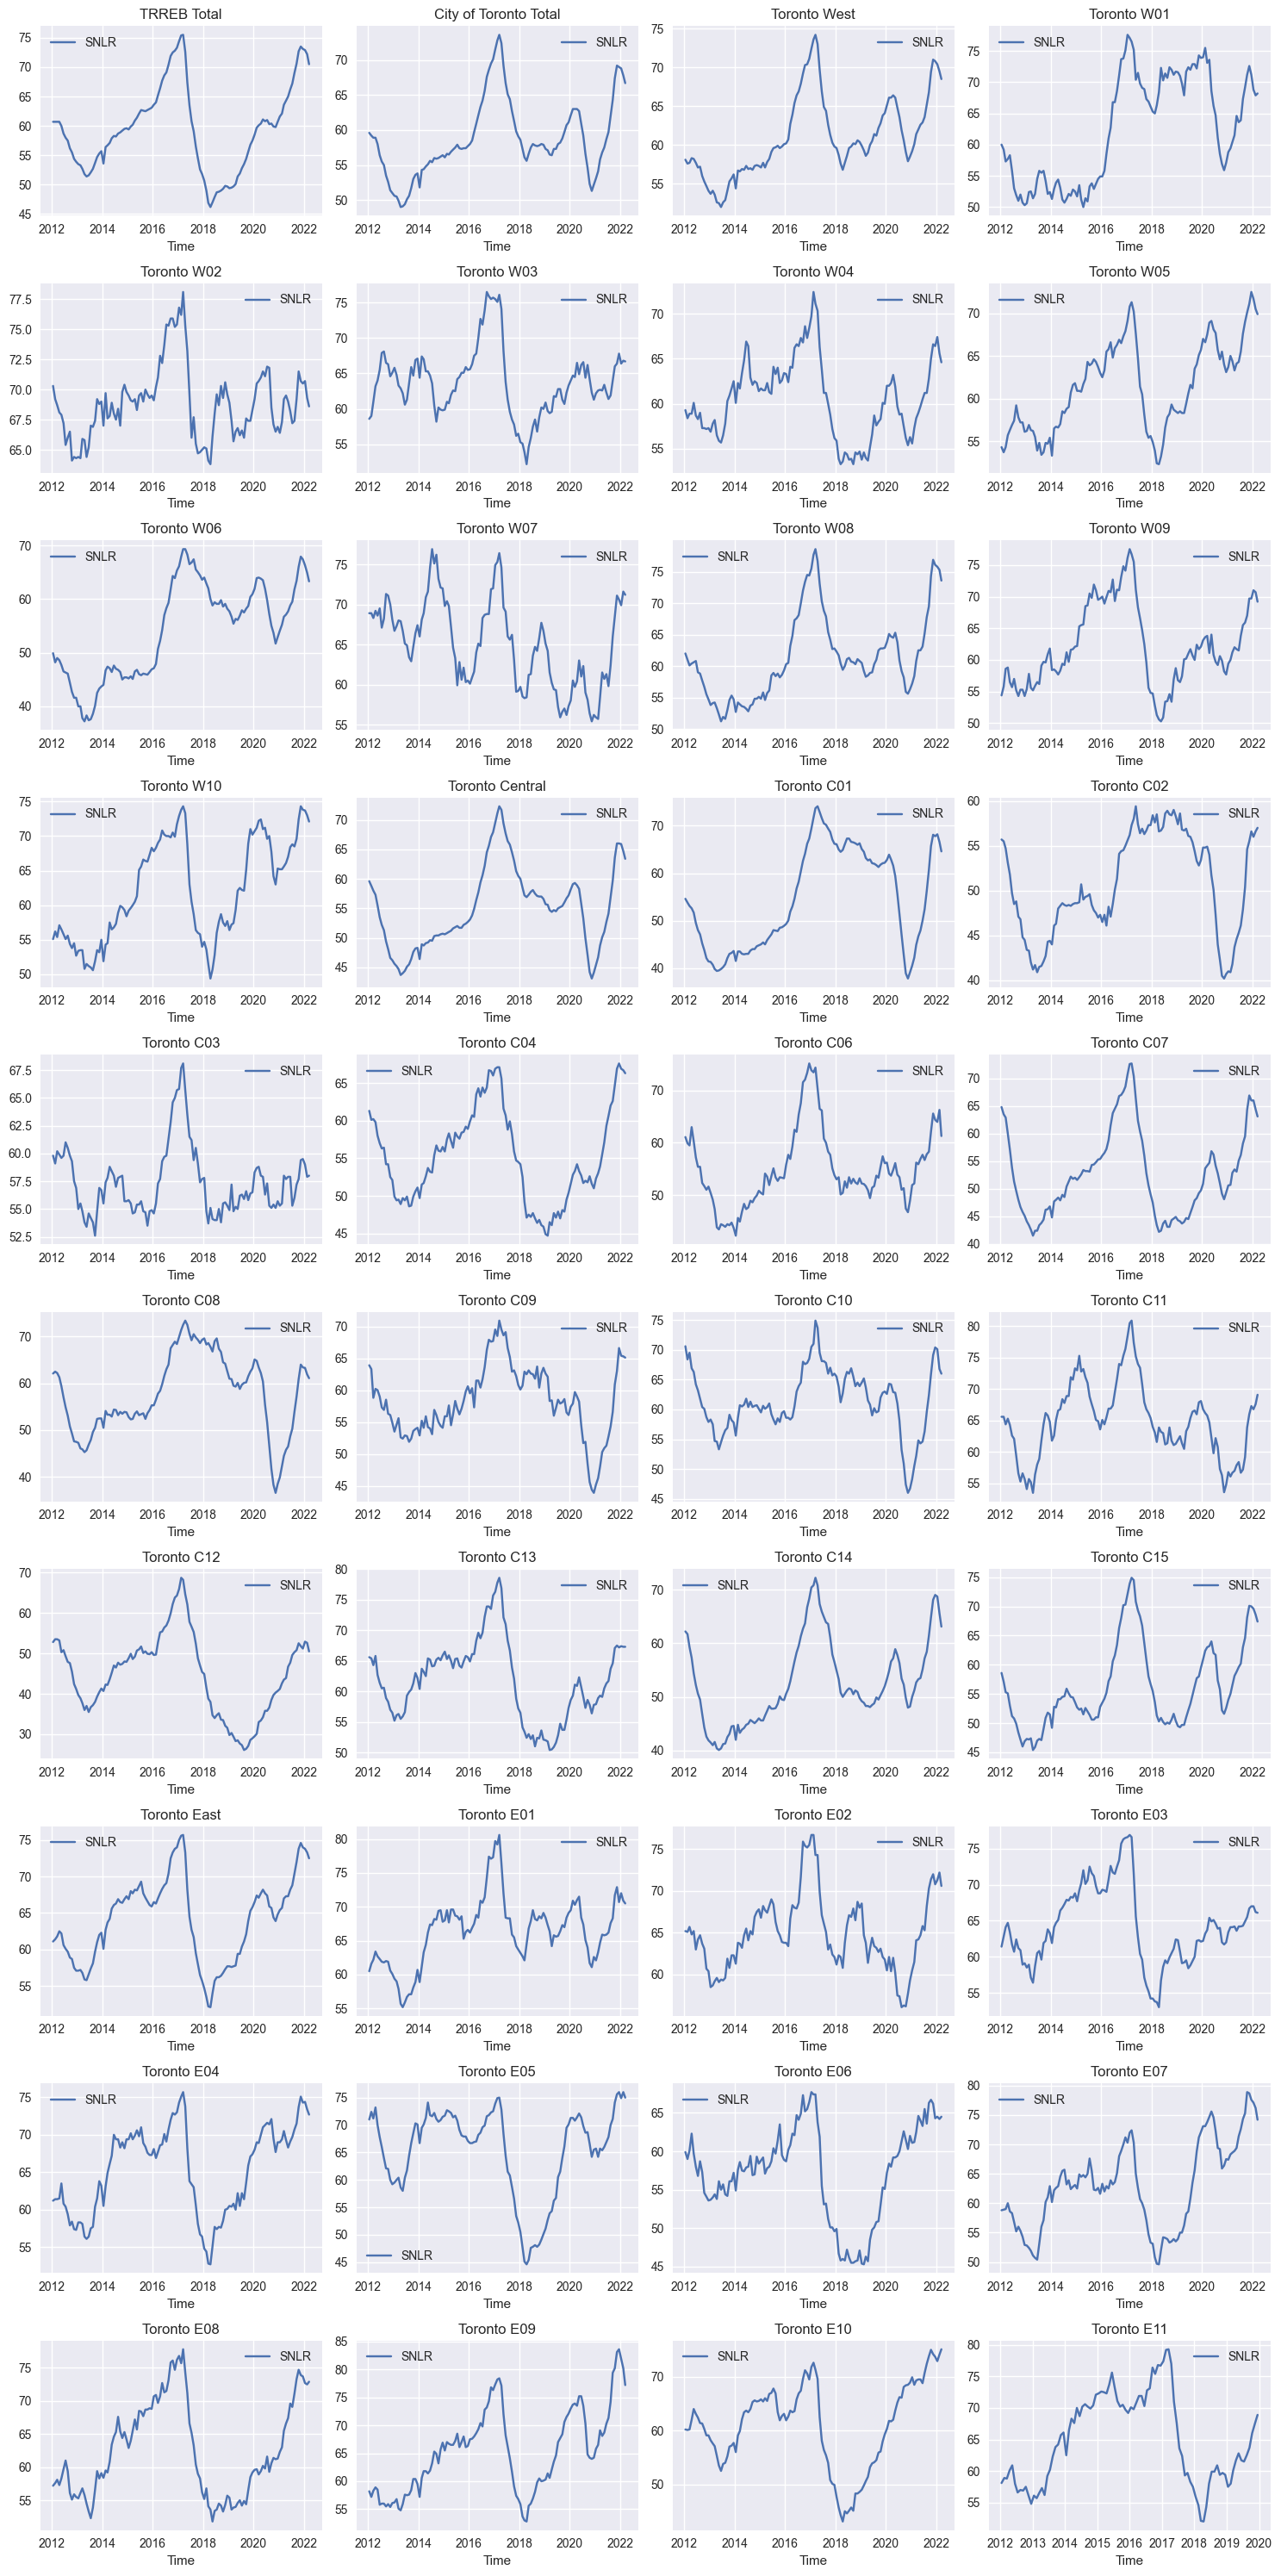

In [333]:
plot_col(df_price, ['SNLR'], 4, figsize=(15,30))
plt.show()

The figure above shows SNLR for different neighbourhoods in Toronto. All three districts C15, C01 and, C08 has `SNLR` ratio greater than 60 in that order. This shows that this is seller's market and there is high demand for the housing. Price are expected to increase in these districts if external factors such as government regulation remain the same.   

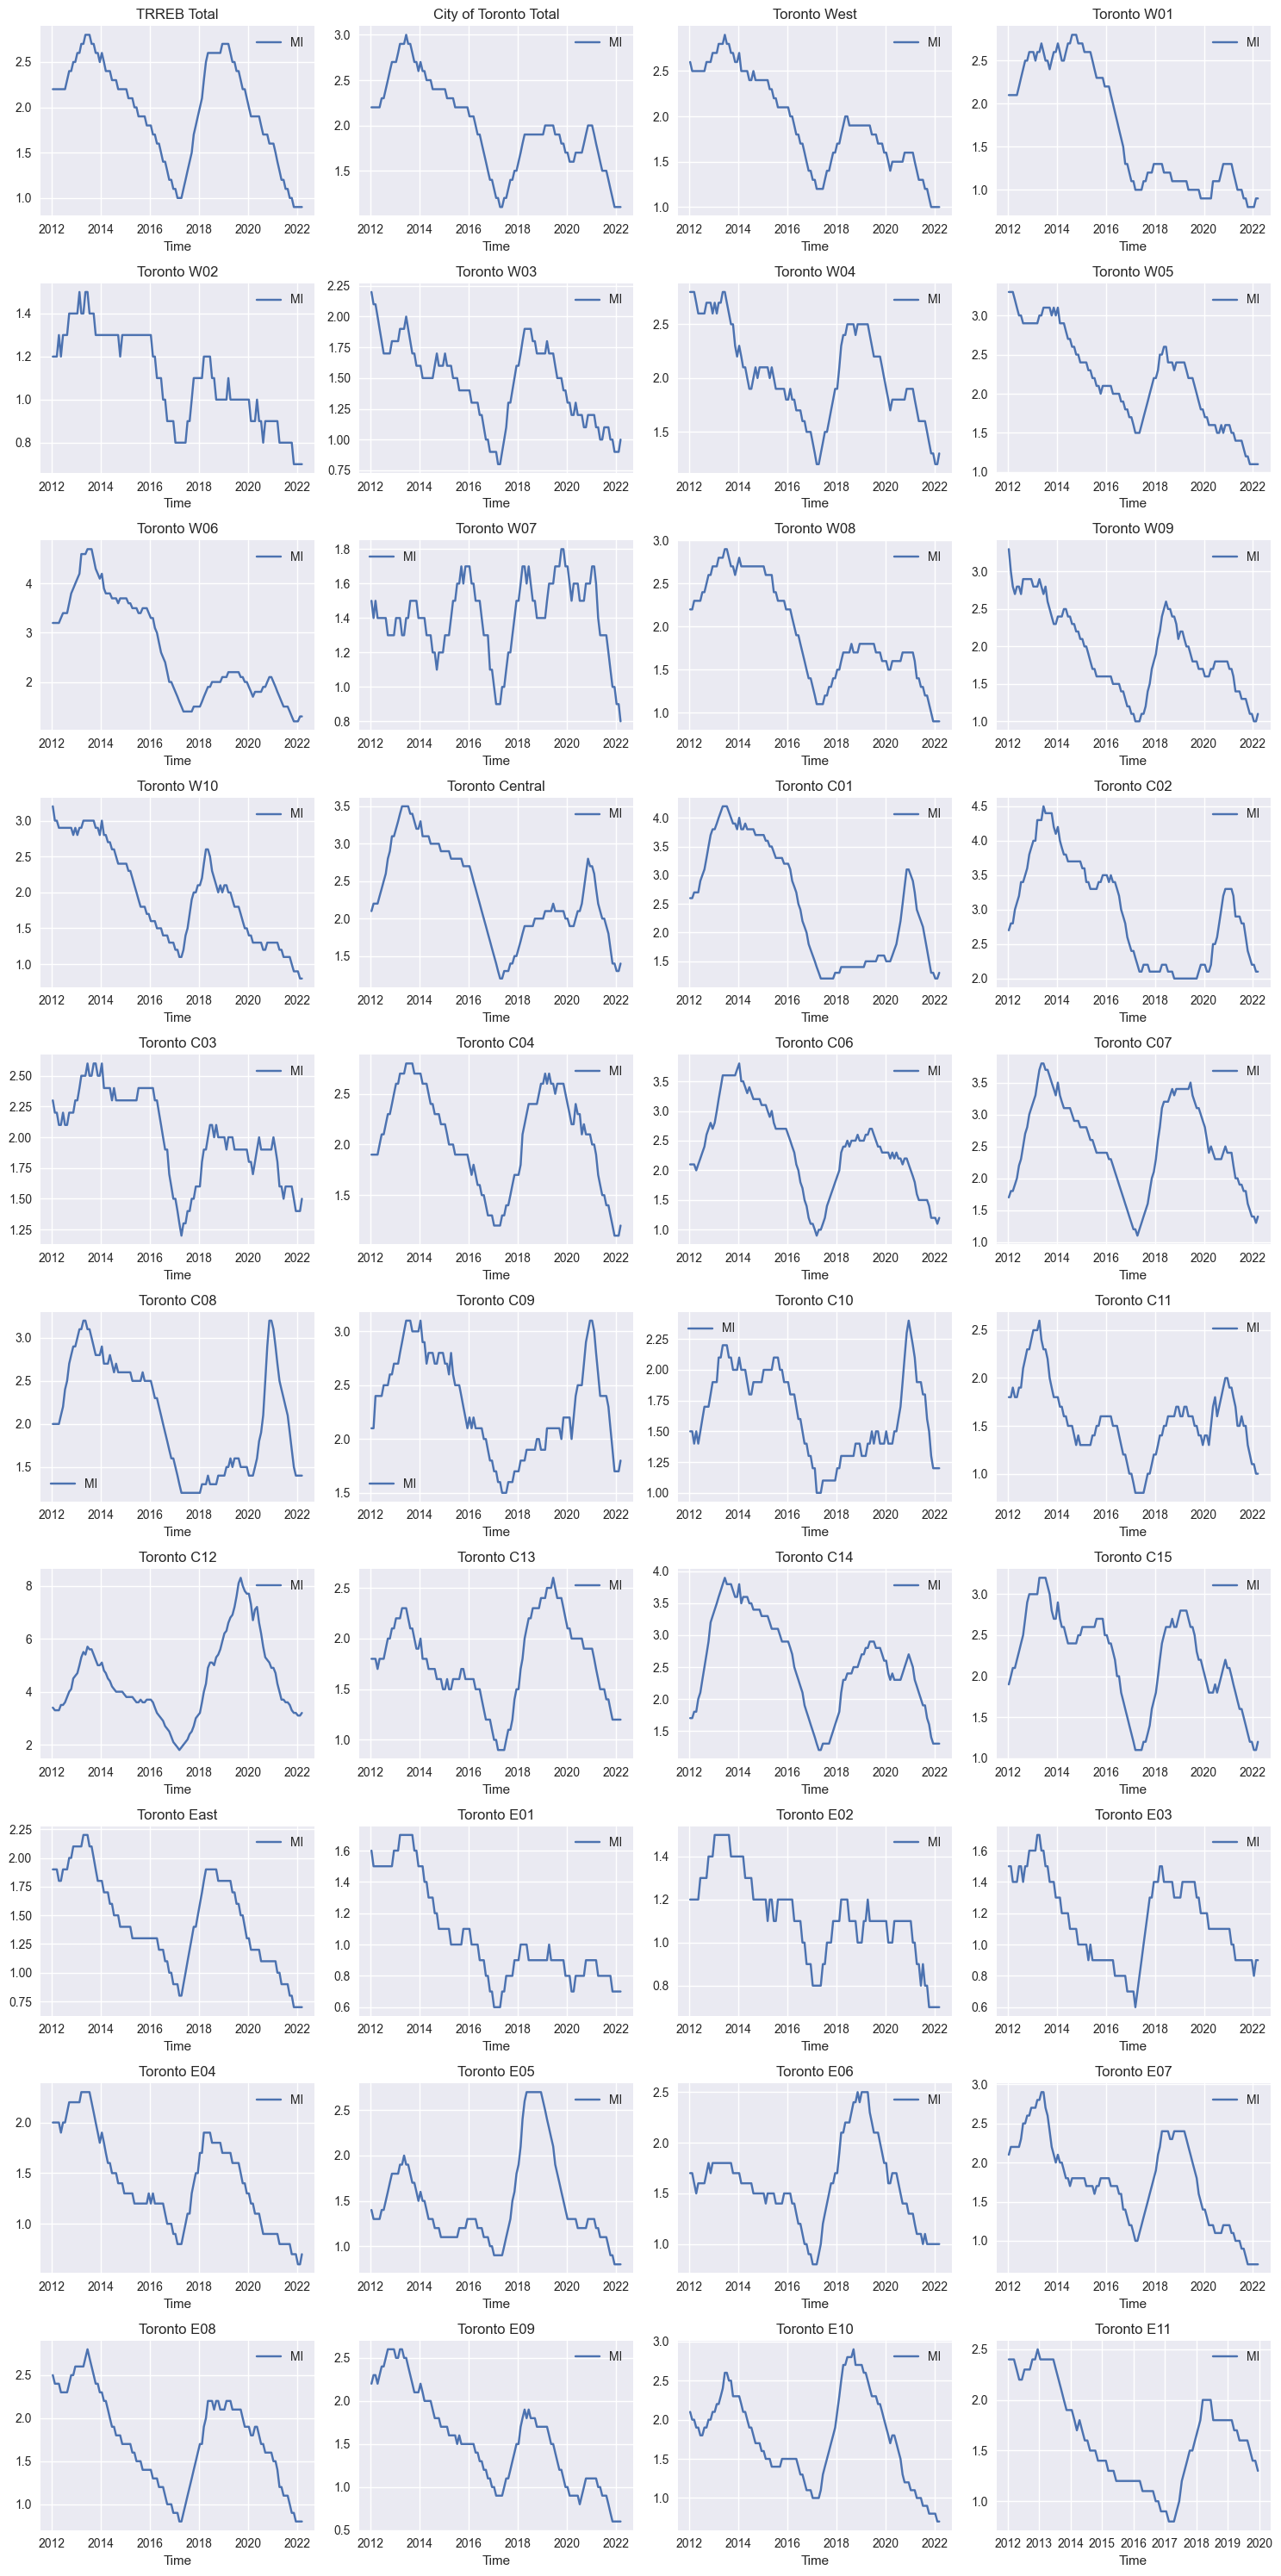

In [334]:
plot_col(df_price, ['MI'], 4, figsize=(15,30))
plt.show()

The figure above shows MI for different neighbourhoods in Toronto. All three districts C15, C01 and, C08 has `MI` ratio less than 4. This shows that this is seller's market and there is high demand for the housing. 

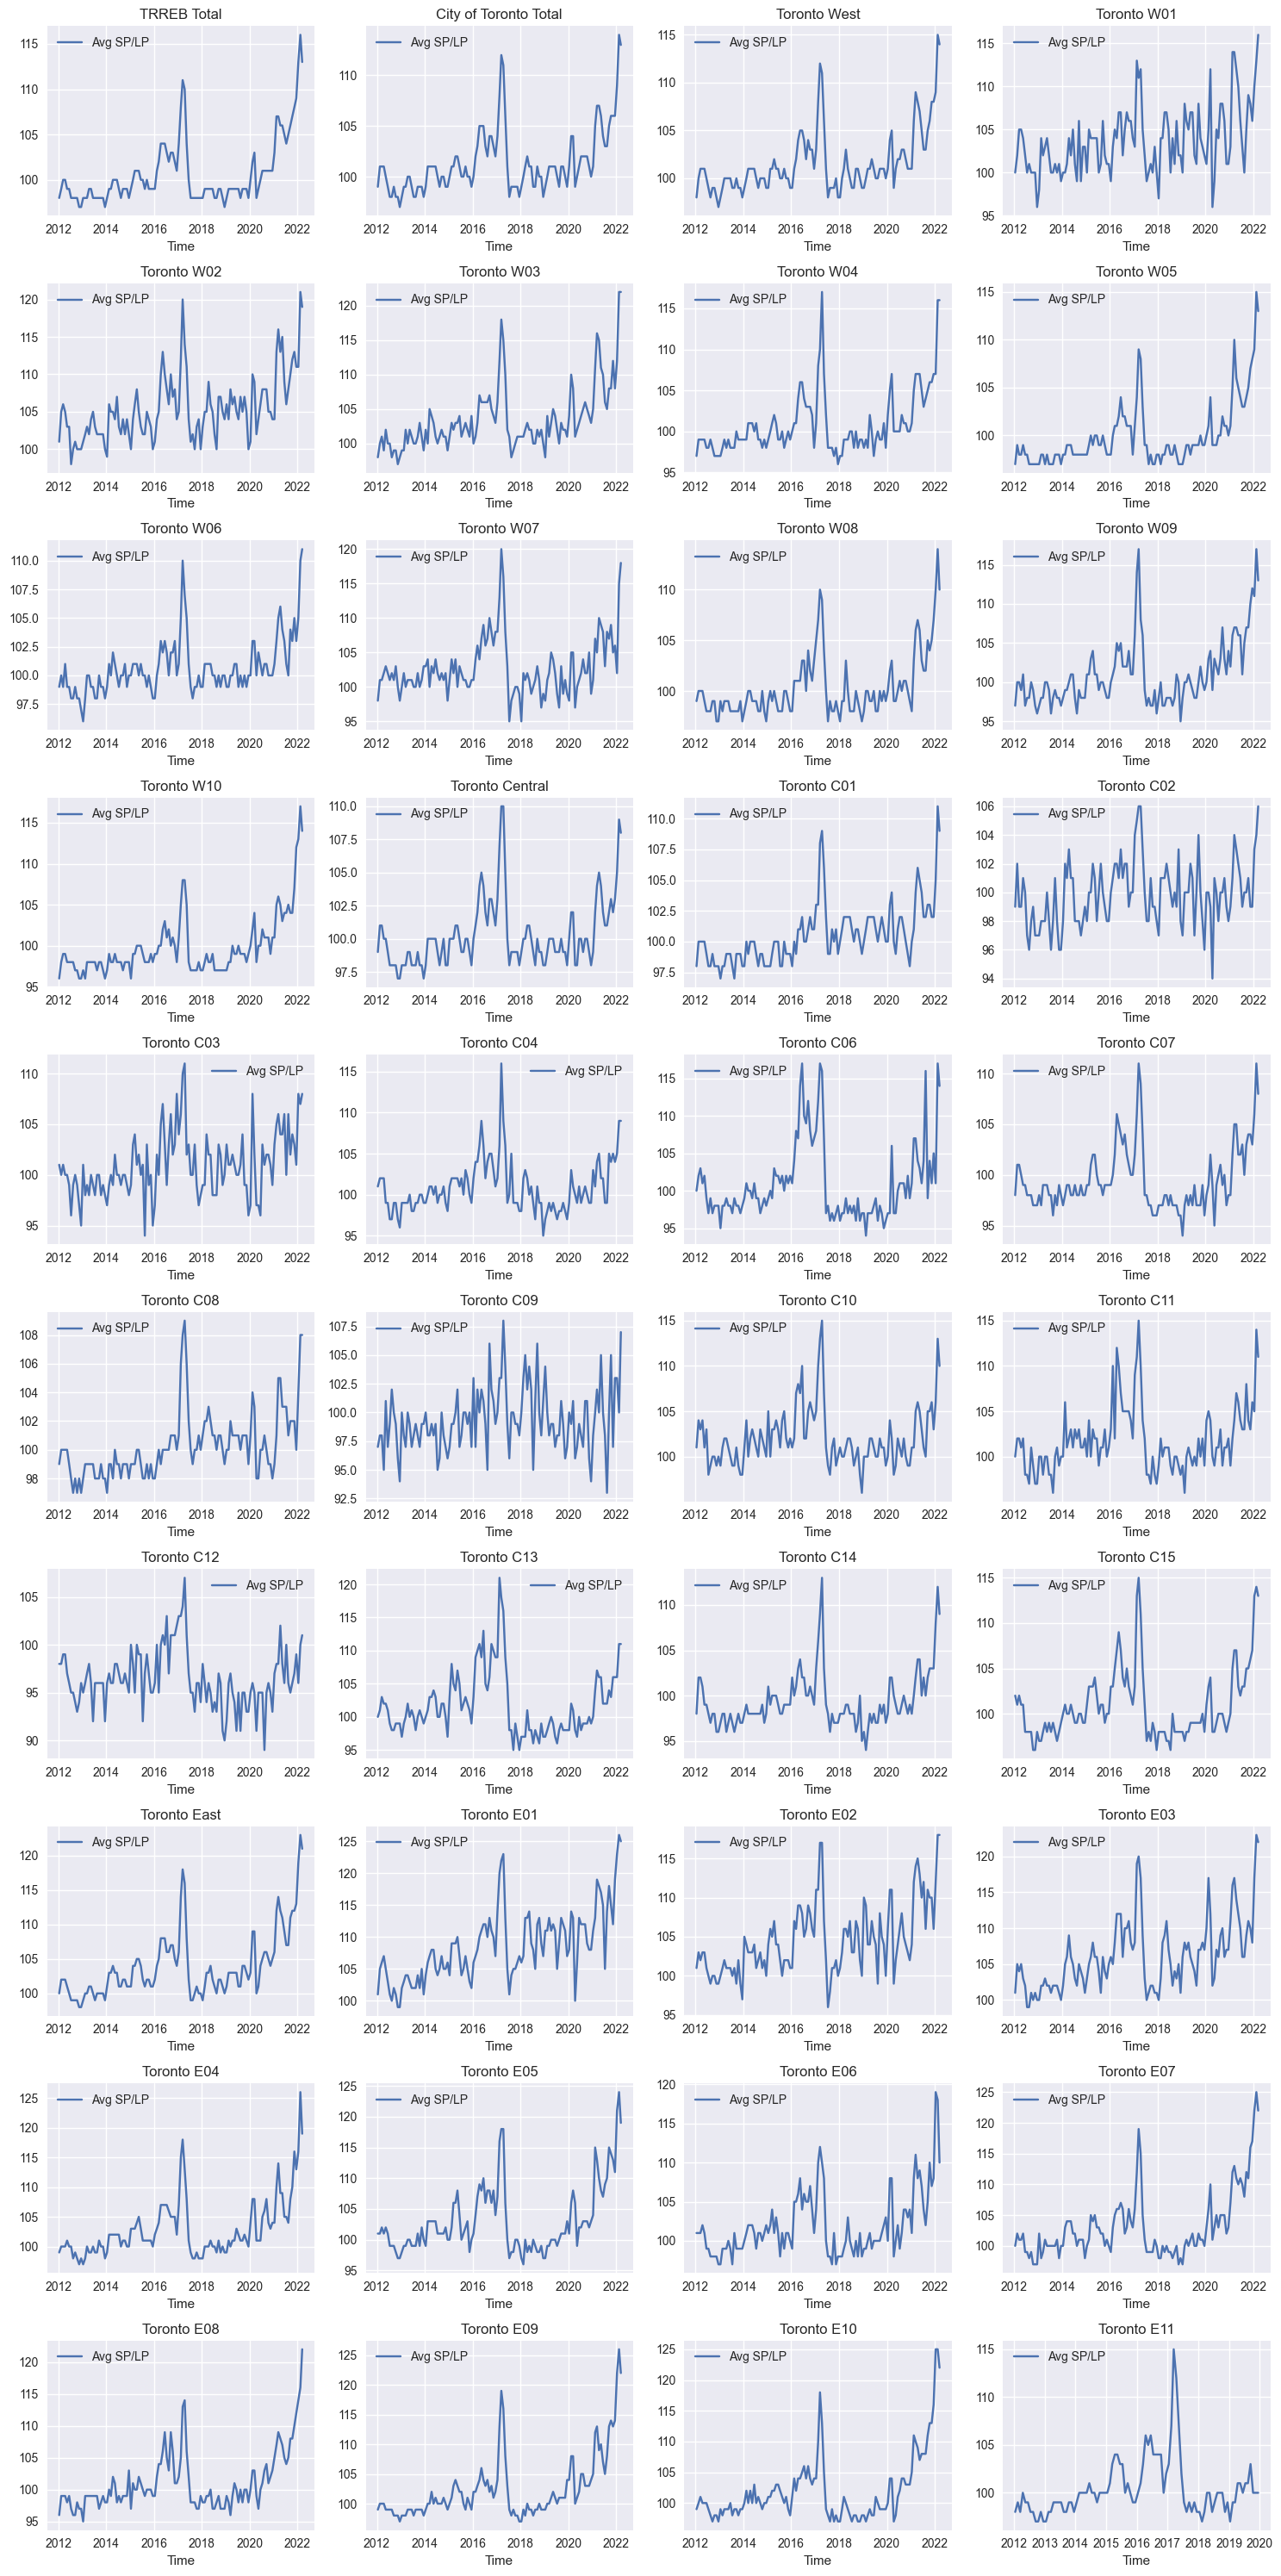

In [335]:
plot_col(df_price, ['Avg SP/LP'], 4, figsize=(15,30))
plt.show()

As expected the average `SP/LP` is more than 105 for all three districts C15, C01 and, C08. This again shows that this is seller's market and there is high demand for the housing.

Until now we have analysed the average price and some important correlating/causal variables for different neighbourhoods in the City of toronto. The analysis tells us that the districts C01, C08, and C15 has lower average housing prices as compared to other districts in Toronto. It was also observed that these districts have seller's market and prices can be expected to go up in the future if external factors such as government regulations etc. remain the same.   

Now let's analyse some bencmark parameters for the houses in different districts of Toronto. For this we will use the MLS index data.  

### Monthly Trend of Benchmark Prices.  

In [200]:
df_MLS.replace({'-':np.nan}, inplace=True)

In [201]:
df_MLS = clean_df(df_MLS, df_MLS.select_dtypes('object').columns[1:])

In [202]:
df_MLS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4487 entries, 0 to 4486
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            4487 non-null   object 
 1   index_Cp        4487 non-null   float64
 2   index_SFD       4487 non-null   float64
 3   index_SFA       4487 non-null   float64
 4   index_Th        4055 non-null   float64
 5   index_Ap        4487 non-null   float64
 6   year            4487 non-null   int64  
 7   month           4487 non-null   int64  
 8   benchmark_Cp    4487 non-null   float64
 9   yrtoyr_chg_Cp   4487 non-null   float64
 10  benchmark_SFD   4487 non-null   float64
 11  yrtoyr_chg_SFD  4486 non-null   float64
 12  benchmark_SFA   4487 non-null   float64
 13  yrtoyr_chg_SFA  4487 non-null   float64
 14  benchmark_Th    4055 non-null   float64
 15  yrtoyr_chg_Th   4057 non-null   float64
 16  benchmark_Ap    4487 non-null   float64
 17  yrtoyr_chg_Ap   4018 non-null   f

In [203]:
df_MLS['year'] = df_MLS['year'] + 2000

In [205]:
df_MLS['day'] = 15

In [206]:
df_MLS['date'] = pd.to_datetime(df_MLS[['year', 'month', 'day']]) 

In [207]:
df_MLS.head()

Name  index_Cp  index_SFD  index_SFA  index_Th  index_Ap  year  \
0       TREB Total     145.6      144.7      149.2     142.0     143.7  2012   
1  City of Toronto     150.5      151.6      158.5     146.5     146.7  2012   
2      Toronto W01     159.2      160.1      165.2     194.8     140.6  2012   
3      Toronto W02     163.0      161.4      182.5     128.1     110.3  2012   
4      Toronto W03     146.9      147.8      150.0       NaN     131.9  2012   

   month  benchmark_Cp  yrtoyr_chg_Cp  benchmark_SFD  yrtoyr_chg_SFD  \
0      2      447400.0           7.30       544800.0            8.39   
1      2      482600.0           6.29       660000.0            8.36   
2      2      567800.0           7.42       840100.0           12.43   
3      2      572400.0          13.67       664800.0           11.54   
4      2      375700.0           6.06       403900.0            7.26   

   benchmark_SFA  yrtoyr_chg_SFA  benchmark_Th  yrtoyr_chg_Th  benchmark_Ap  \
0       426900.0            8.51      323500.0           6.13      303300.0   
1       529300.0            9.31      370200.0           5.02      320100.0   
2       632500.0            9.84      351500.0          17.92      322800.0   
3       557600.0           17.14      366800.0           4.83      326600.0   
4       386100.0            5.71           NaN            NaN      216300.0   

   yrtoyr_chg_Ap  day       date  
0           4.06   15 2012-02-15  
1           3.31   15 2012-02-15  
2          -3.63   15 2012-02-15  
3          -1.52   15 2012-02-15  
4          -7.83   15 2012-02-15

In [208]:
df_MLS['Name'].unique()

array(['TREB Total', 'City of Toronto', 'Toronto W01', 'Toronto W02',
       'Toronto W03', 'Toronto W04', 'Toronto W05', 'Toronto W06',
       'Toronto W07', 'Toronto W08', 'Toronto W09', 'Toronto W10',
       'Toronto C01', 'Toronto C02', 'Toronto C03', 'Toronto C04',
       'Toronto C06', 'Toronto C07', 'Toronto C08', 'Toronto C09',
       'Toronto C10', 'Toronto C11', 'Toronto C12', 'Toronto C13',
       'Toronto C14', 'Toronto C15', 'Toronto E01', 'Toronto E02',
       'Toronto E03', 'Toronto E04', 'Toronto E05', 'Toronto E06',
       'Toronto E07', 'Toronto E08', 'Toronto E09', 'Toronto E10',
       'Toronto E11', 'TRREB Total'], dtype=object)

In [209]:
df_MLS.replace({'TREB Total': 'TRREB Total'}, inplace=True)

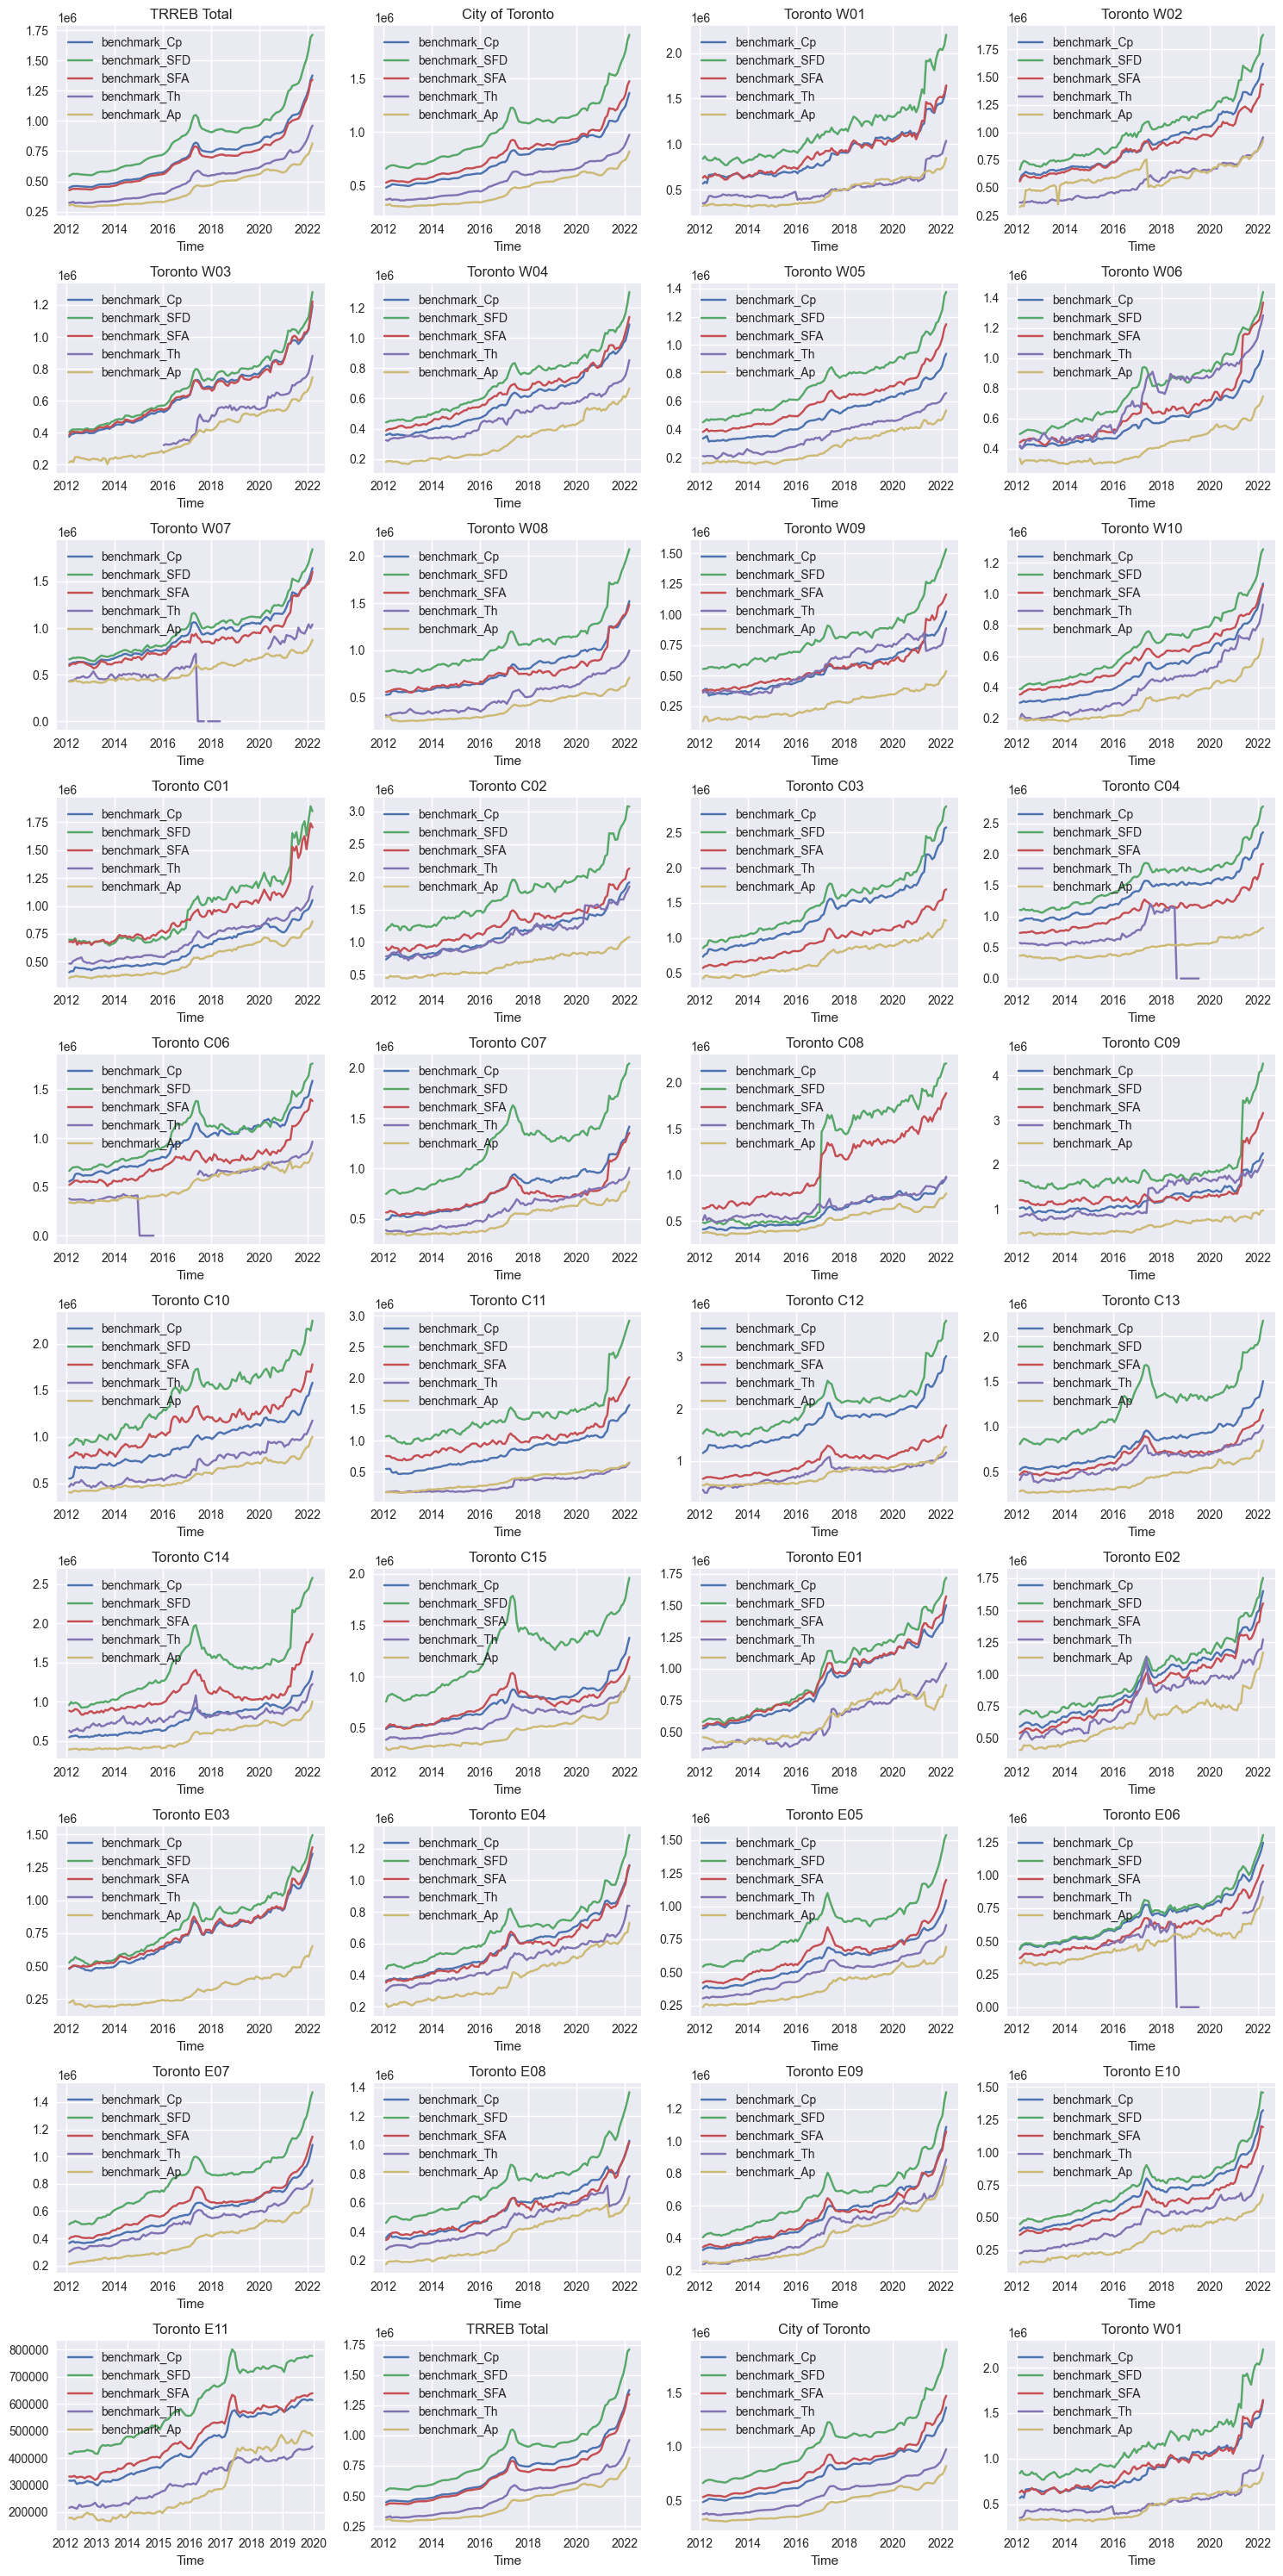

In [337]:
plot_col(df_MLS, ['benchmark_Cp', 'benchmark_SFD', 'benchmark_SFA',
                  'benchmark_Th', 'benchmark_Ap'], 4, figsize=(15,30))
plt.show()

The benchmark price is calculated by TRREB to gauge a neighbourhood’s home price levels and trends.  This price is calculated using a index which is determined based on a sophisticated statistical model that takes into account a home’s quantitative (e.g., the number of rooms it has) and qualitative (e.g., whether it has a finished basement) features.     

The figure above shows benchmark prices for composite (Cp), Single family detached (SFD), Single family attached (SFA), Townhouse (Th), and Apartments (Ap) houses over last 10 years.  
We can see for all the districts SFD houses has the highest price while apartments have the lowest benchmark price. After SFA people prefer SFD and composite type houses as shown by the graph trends.   

Interestingly C01 and C08 did not have much difference in the benchmark price for SFD and SFA type houses as seen for other districts. 

We can compare these benchmark prices to average house price for understanding inflation in prices for different types of houses. 

__One thing to note here, the benchmark price for SFD houses in C15 district is more than 2 million but the average house price was only one million__

This represents two things: 1. Either the houses are undervalued in C15 district or 2. The SFD prices are too high as compared to other types of housing which is driving the average house prices lower than 1M.   

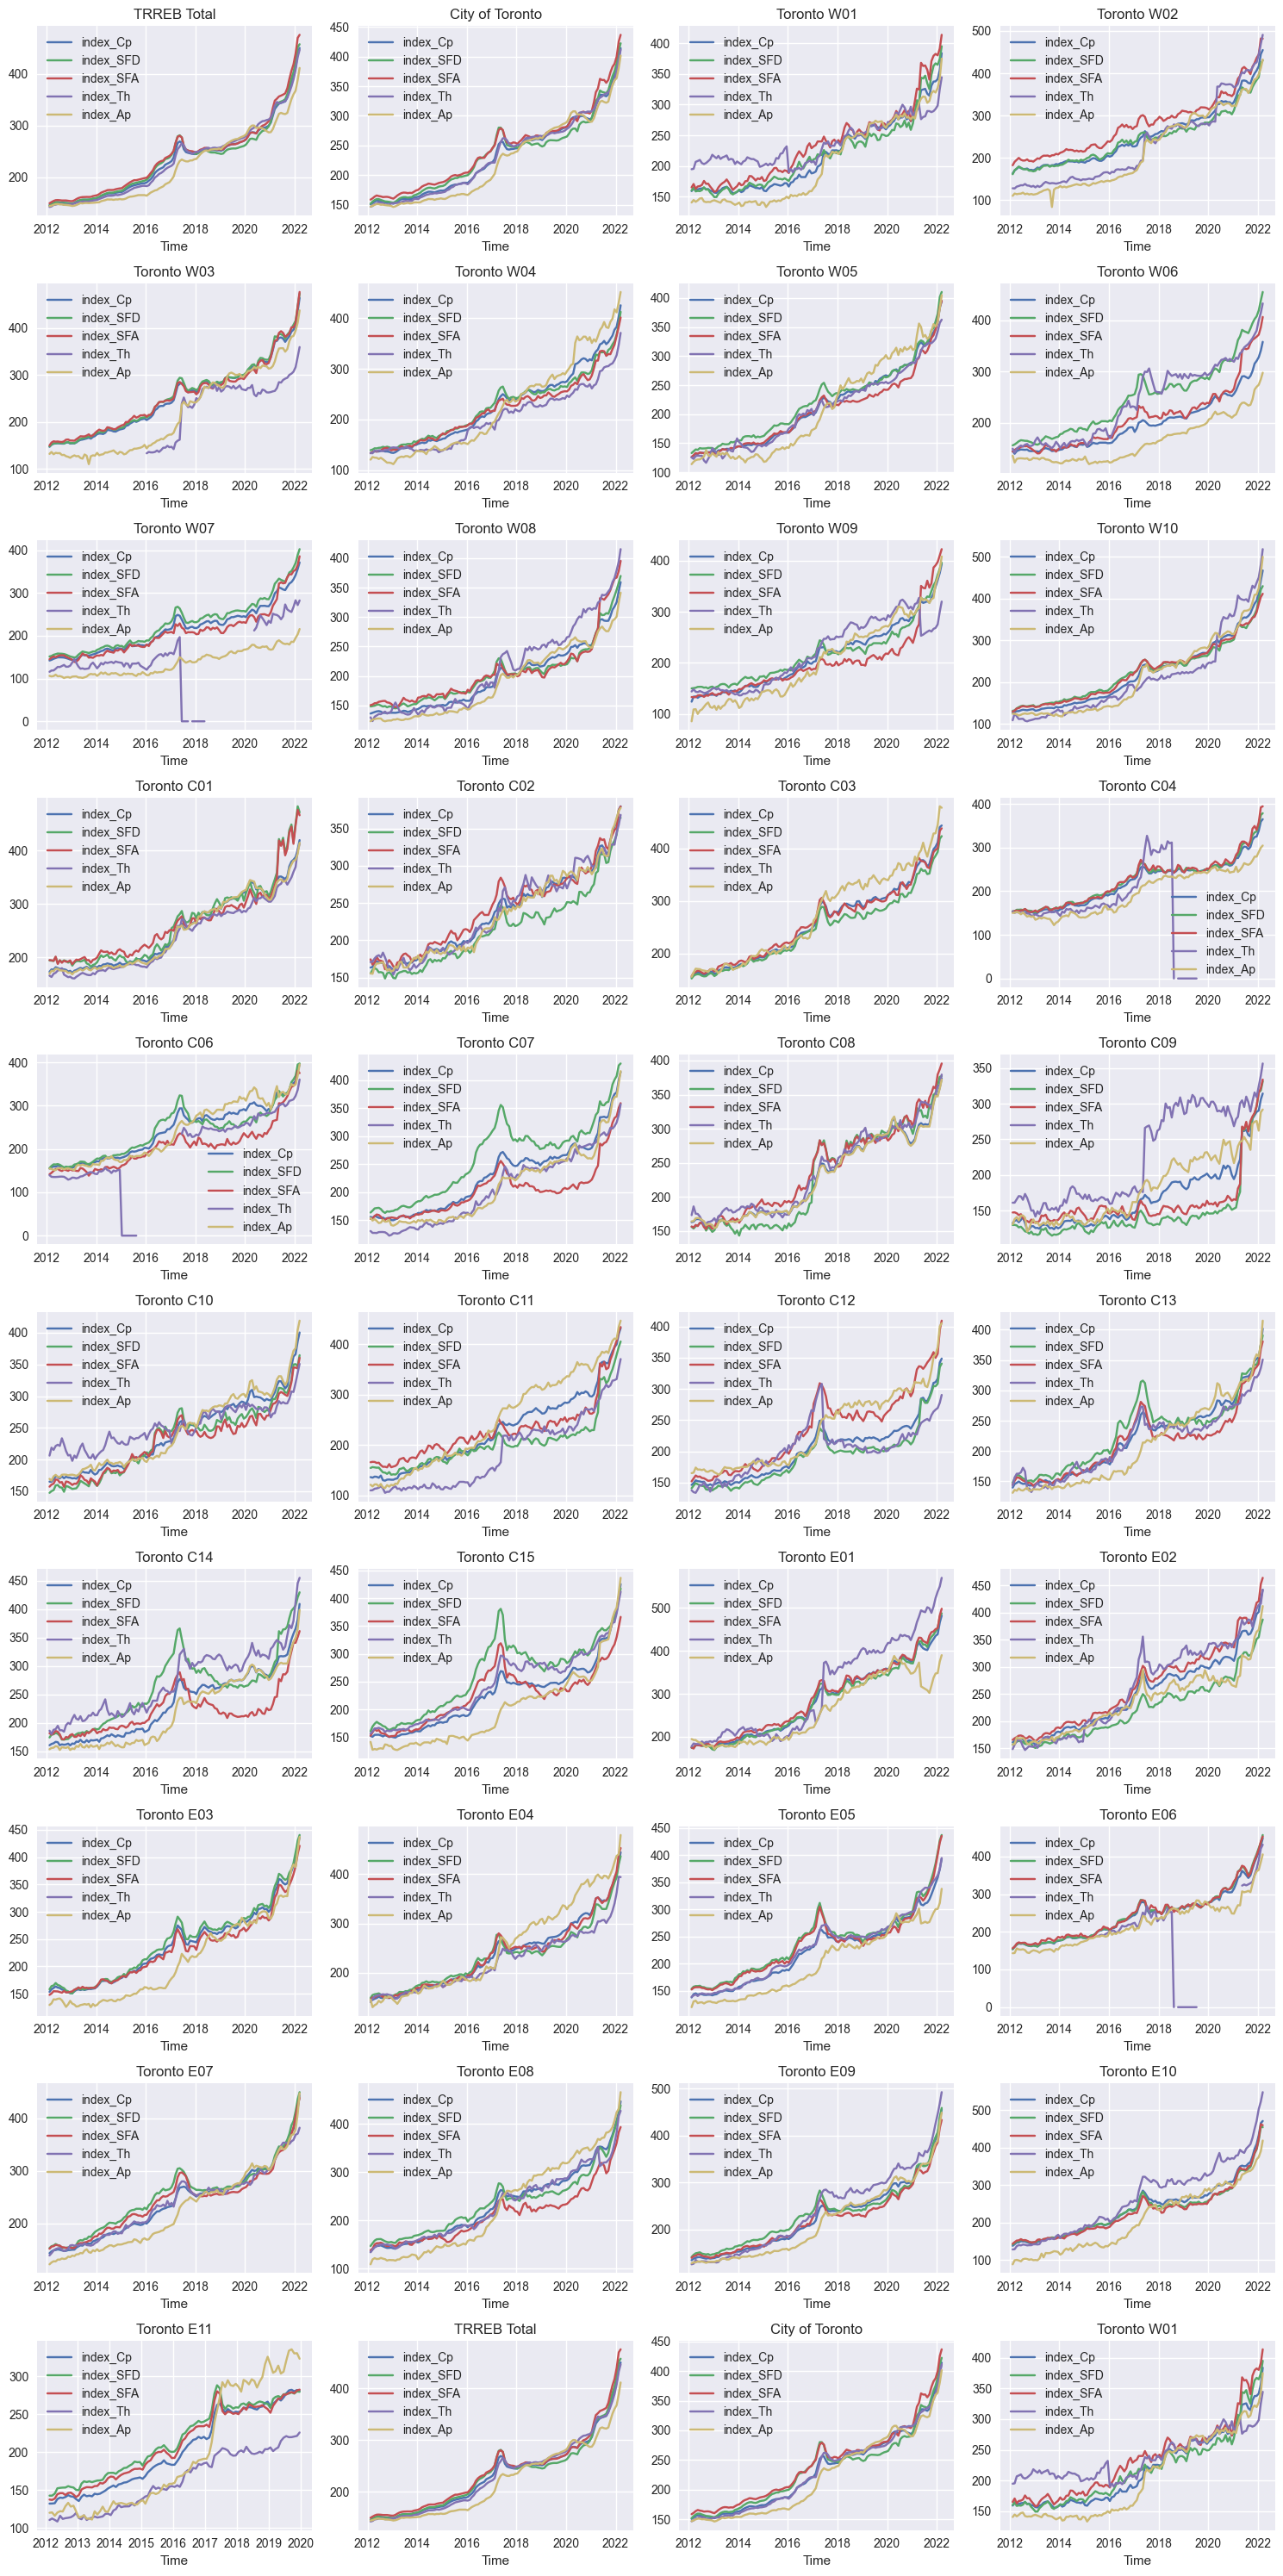

In [338]:
plot_col(df_MLS, ['index_Cp', 'index_SFD', 'index_SFA',
                  'index_Th', 'index_Ap'], 4, figsize=(15,30))
plt.show()

The figure above shows the variation fo MLS® HPI index for differenty types of houses over last 10 years. The index represents change in housing prices by comparing price levels at a point in time to price levels in a base (reference) period. The base period has an index value of 100. The bechmark prices in for this data are set at Juanualy 2005. 

So if the index for a house is 300, this means that the price for this house has increased by 200% from the based period.  

If we look at the index for different types of houses for the districts C01, C08 and C15, we can see that the increase in index for C01 for SFD, and SFA is largest in the recent years. This means demand for SFD and SFA houses are high in district C01. For C08, index in increasing approximately at similar rate for all types of houses. This shows that demand for all types of houses are high in C08. Finally, the index for apartments has increased drastially for C15 in the recent months this means the rate of increase in demand for apartments is more as compared to other types of houses. 

### Conclusion

In this notebook, we first analyzed the trend in average housing price for the city of toronto since 1976. Different socioeconomic parameters such as population, interest rates, and sales were plotted against average housing price to understand and predict the trend of price over time. The annual analysis of trend also gave insights into housing market events such as in `1989`, `2008`, and `2017` when housing prices had sudden changes over small duration of time.   

After understanding annual trend in housing prices, we analyzed the housing price trend with more granular data. The annual housing price for each district in toronto was plotted with month over last 10 years. The price was also plotted against different parameters such as `SNLR`, `MI`, `Avg SP/LP`, `Avg DOM` to understand the causes of increae in the drastic price in recent years. Based on the values of `SNLR`, `MI`, `Avg SP/LP`, `Avg DOM` it was observed that the housing market in each of the districts is seller's market. We concluded that there is lack of supply based on these parameter values and we recomment to bring a policy to deal with lack of supply.   

Finally, we plotted index and benchmark price for each type of houses for each neighbourhood in the city of Toronto. The index again showed that the for every district there is very high demand for each type of houses. The benchmark price for different types of houses helped us in comparing the relative prices for each type of house in each neighbourhood.   

Based on the analysis we observed that the districts C01, C08, and C15 had the lowest average price as compare to other districts. We recommend the potential developers and customers to buy property in these districts due to lower prices as compared to other districts. Although furter analysis is required to understand the factors that are cuasing low prices in these districts.    

In future, we plan to compare the benchmark prices to the average price for each of the house type to understand the inflation if prices. The present average price in this study is for all types of houses, we will scrape average prices for each type of house from TRREB website to better understand the recent changes in prices.     
Also, we would collect data for immigrants in the city and analyse the effect of immigration on housing prices in the city.    
Finally, we also plan to understand the demand side of the housing market. According to a [study](https://www.teranet.ca/teranet-blog/teranets-latest-market-insight-report-an-update-on-ontarios-buyer-segments/) 25% buyers are investors and they own more than one properties. It would be interesting to see how these investors affect the housing prices in City.    
